<a href="https://colab.research.google.com/github/costaivo/my-notes/blob/main/EDA_Netflix_Suryakant_DSML_Int_Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metric 1: **Problem Statement:**

Analyze the Netflix Dataset provided for finding the Key Insights about the strategy that is already working for them and basis these insights suggest actionable recommendations which might help them increase the revenue. 

## **Key Analysis Metrics:**
 
Strategy can be in terms of :

a) Movie genres being released in each country
b) cast of the movies, distribution of movies and tv series 
c) checking this distribution trend of tv shows and movies over years
d) duration of the content,
e) impact of launch timings 
f) Number of Movie releases per year and checking this trend

Importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into Pandas Dataframe for further analysis





In [ ]:
nf_data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

Evaluation Metric 2: **Checking Data Info**

In [ ]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Data Shape**
This dataset contains 8807 rows and 12 columns. 

**Data Attributes Type**

All the columns present in the dataset except **release_year** attribute, which is **int** type, are of Object Type. There are few columns which require type change for eg. **date_added** and **duration**.

Missing Value Info

**Director, Cast, Country,date_Added ,rating** and duration are having missing values


**Checking first 5 lines of data**

In [ ]:
nf_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Changing DataType of **date_added** and **duration**

In [ ]:
nf_data['date_added'] = pd.to_datetime(nf_data['date_added'])
nf_data['duration'] = nf_data['duration'].str.split(' ',expand=True)[0].astype('float')

In [ ]:
nf_data[['duration','date_added']]

,duration,date_added
0,90.0,2021-09-25
1,2.0,2021-09-24
2,1.0,2021-09-24
3,1.0,2021-09-24
4,2.0,2021-09-24
...,...,...
8802,158.0,2019-11-20
8803,2.0,2019-07-01
8804,88.0,2019-11-01
8805,88.0,2020-01-11


Checking Unique values of columns **type,rating** and **listed_in**

In [ ]:
for item in ['type','rating','listed_in']:#, 'listed_in']:
  
  print(item,": ",nf_data[item].nunique())

type :  2
rating :  17
listed_in :  514


In [ ]:
for item in ['type','rating']:#, 'listed_in']:
  
  print(item,": ",nf_data[item].unique())

type :  ['Movie' 'TV Show']
rating :  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


There are some unintended values in rating column which were supposed to be there in Duration column. so fixing this issue

In [ ]:
nf_data['duration'][(nf_data['rating']=='84 min')]= 84
nf_data['duration'][(nf_data['rating']=='74 min')] = 74
nf_data['duration'][(nf_data['rating']=='66 min')] = 66
nf_data['rating'][(nf_data['rating']=='84 min')|(nf_data['rating']=='74 min')|(nf_data['rating']=='66 min')] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

Since Rating consists of some noise values its better to re

Above columns **type**,**rating** and **listed_in** are having distinct categories values . hence these columns are catregorical attributes. Changing the data attributres of these columns to **Categorical**

In [ ]:
nf_data[['type','rating','listed_in']] = nf_data[['type','rating','listed_in']].astype('category')

# Evcaluation Metric 5 **Handling and finding wether  Missing Values are there or there is some reason**

Columns which have missing values are **Director, Cast, Country,date_Added ,rating** and **duration**. Hence looking at distriburion of each missing value numbers 

In [ ]:
for item in ['director','cast','country','date_added','rating','duration']:

  print(item,":",nf_data[item].isna().sum()/nf_data.shape[0]*100)

director : 29.908027705234474
cast : 9.367548540933349
country : 9.435676166685592
date_added : 0.11354604292040424
rating : 0.07948223004428297
duration : 0.0


**rating** and **duration** attributes are having very minimal missing values less than 1 %. Hence we will replace all this missing values with most common occurence in those columns.
 For **date_added** column we will drop the rows where value is nan since number of missing values is very minimal (0.11%).

In [ ]:
nf_data['rating'][nf_data['rating'].isna()] = nf_data['rating'].value_counts().index[0]

nf_data['duration'][(nf_data['duration'].isna()) &(nf_data['type']=='Movie')] = nf_data['duration'][nf_data['type']=='Movie'].value_counts().index[0]
nf_data['duration'][(nf_data['duration'].isna()) &(nf_data['type']=='TV Show')] = nf_data['duration'][nf_data['type']=='TV Show'].value_counts().index[0]

nf_data = nf_data[nf_data['date_added'].isna()==False].reset_index(drop=True)
nf_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8792,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8793,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8794,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8795,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Missing  Value Imputation Strategy for Country column

For each director , find out the most occurences of Country from which he/she belongs to and fill the missing values accordingly.
Still if some missing values are there due to missing values of Directors fill those values with "Not Available"

In [ ]:
for items in nf_data['director'][nf_data['director'].isna()==False].unique():

  
  try:
    
    nf_data['country'][(nf_data['country'].isna())&(nf_data['director']==items)] = nf_data['country'][nf_data['director']==items].value_counts().index[0]

  except Exception as e:

    nf_data['country'][(nf_data['country'].isna())&(nf_data['director']==items)] = 'Not Available'

  
nf_data['country'][nf_data['country'].isna()] = 'Not Available'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


#  Missing Value Imputation Strategy for Cast
**Checking the rows where Cast column is missing**


Upon checking it is observed  that cast is actually missing most of times when the content is listed either in **Documentaries** or **Docuseries**

In [ ]:
nf_data[nf_data['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Not Available,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,Not Available,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,Not Available,2021-09-22,2021,TV-MA,1.0,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,Not Available,2021-09-22,2020,TV-MA,67.0,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8736,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland",2018-02-26,2017,TV-14,85.0,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8745,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,2016-11-01,2010,TV-14,3.0,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8746,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,2019-08-13,2019,TV-MA,97.0,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8753,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45.0,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [ ]:
sum(nf_data['listed_in'][nf_data['cast'].isna()].str.contains('Docu'))

631

Its actually proven from above cell reslt. About 631 out of 825 missing entries of Cast is there when content is listed either in Documentary or docuseries. hence we may impute such missing cases of Cast with word **Documentary Cast**

In [ ]:
nf_data['cast'][(nf_data['cast'].isna())&(nf_data['listed_in'].str.contains('Docu'))] = 'Documentary/Reality show Cast'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For remaining missing value of cast we may fill the missing values with **'Not Available'**

In [ ]:
nf_data['cast'][(nf_data['cast'].isna())] = 'Not Available'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Missing Value Imputation value strategy for column Director

Checking the Rows where Directors columns are empty

In [ ]:
nf_data[nf_data['director'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,Documentary/Reality show Cast,Not Available,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,Documentary/Reality show Cast,Not Available,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,Documentary/Reality show Cast,Not Available,2021-09-22,2021,TV-MA,1.0,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [ ]:
nf_data['type'][nf_data['director'].isna()].value_counts()

TV Show    2436
Movie       188
Name: type, dtype: int64

From above cell results its proven that most director colums are misssing when content type is TV show and hence there might be no offfical director. So imputing Director Missing Values when it is TV Show with TV Show producer

In [ ]:
nf_data['director'][(nf_data['director'].isna())&(nf_data['type']=='TV Show')] = 'TV Show Producer'

def fuun(x):
  try:
    return x['director'].fillna(x['director'].value_counts().index[0]).values
  except Exception as e:
    return x['director'].fillna("Not Available").values

new_df = nf_data[nf_data['director'].isna()==False].groupby(['title','country','listed_in']).apply(fuun).explode().reset_index()

nf_data = nf_data.merge(new_df,how='inner',left_on=['title','country','listed_in'],right_on=['title','country','listed_in'])
del nf_data['director']

nf_data.rename(columns = {0:'director'},inplace=True)
nf_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
0,s1,Movie,Dick Johnson Is Dead,Documentary/Reality show Cast,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show Producer
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Documentary/Reality show Cast,Not Available,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show Producer
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show Producer
...,...,...,...,...,...,...,...,...,...,...,...,...
8604,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher
8605,s8804,TV Show,Zombie Dumb,Not Available,Not Available,2019-07-01,2018,TV-Y7,2.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",TV Show Producer
8606,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer
8607,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt


# Checking for Missing Values again 

In [ ]:
nf_data.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
director        0
dtype: int64

## Evaluation  Metric 2 **Checking Descriptive Stats of all the Data**

Checking for Numerical datatype first

In [ ]:
nf_data.describe()

,release_year,duration
count,8609.000000,8609.000000
mean,2014.130096,69.968754
std,8.864521,51.024917
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,89.000000
75%,2019.000000,106.000000
max,2021.000000,253.000000


## **Top Summary Stats**


1.   Maximum Duration of Content is 312 minutes
2.   **50% of Content duration is between 89 minutes to 106 minutes**
3.   **75% of the content is below 106 minutes.**
4.   Half of the Netflix Content are from year 2017 onwards
5.   **Content released before year 2013 contribute only 25% of Netflix content.**
6.   Datset consists of content released till Year 2021
7.   Most oldest content in the dataset is the one which was released in year 1925.
8.   **Netflix Content is skewed towards release date after 2017.**
9.   Since content is of type Movie as well as TV show, so we have to see stats summary od Duration seperately for these two categorties to get more insights,





**Checking Summary Stats for data with Movie Type**

In [ ]:
nf_data[nf_data['type']=='Movie'].describe()

,release_year,duration
count,5943.000000,5943.000000
mean,2013.010601,100.570756
std,9.749076,27.313278
min,1942.000000,3.000000
25%,2012.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,115.000000
max,2021.000000,253.000000


# Top Summary Stats wrt Duration and Release Year for Movie content



1.   **50% of movies in Netflix are having duration in range of 87 to 114 minutes**
2.   Duration is more or likely following Normal distribution( as mean is approximately equal to median) and having few outliers towards very short movies(3 minutes) and very long movies (312 minutes).
3.  **Oldest movie content in Ntflix dates back tpo 1942 and latest movie is from year 2021**
4.  **Stats of release year is agnostic of content type('Movie /TV Show') and follows the same insights given earlier for both content types**





Checking for Numerical datatype first

In [ ]:
non_numerical_cols = list(set(nf_data.columns)-set(['release_year','duration']))

In [ ]:
nf_data[non_numerical_cols].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,title,description,country,date_added,listed_in,type,rating,director,cast,show_id
count,8609,8609,8609,8609,8609,8609,8609,8609,8609,8609
unique,8609,8581,746,1706,511,2,14,4529,7588,8609
top,Dick Johnson Is Dead,"Paranormal activity at a lush, abandoned prope...",United States,2020-01-01 00:00:00,"Dramas, International Movies",Movie,TV-MA,TV Show Producer,Documentary/Reality show Cast,s1
freq,1,4,2783,110,361,5943,3142,2436,601,1
first,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


# Top Insights from above Summary Stats:

1.   **Highest Number of Content is from United States**
2.    **Netflix has highest number of content of category TV-MA**
3.    **Netflix has content from 749 countries.**
4.  **Most content are of Genre  "Dramas/International Movies"**
5.   Netflix has 513 unique Genre contents.
6.  **Netflix has highest number of content added on 1st January 2020**
7.  **Netflix has till date close to about 8800 Movies and TV shows.**
8.   There are close to about 4500 + unique Directors content.
9.   **About two-third of content(6131 out of 8797) is Movie**
10.  Since Cast and Director were having significant Not available information we may have to analyze these columns after removing Not available information.

11.  Also since there are multiple cast,director in single title these columns have to be pre-processed and then analyzed for geting more insights 







# Preprocessing : Expanding Comma seperated Genre

In [ ]:
genre_df = nf_data['listed_in'].str.split(',',expand=True)

genre_df['title'] = nf_data['title']
genre_df = genre_df.melt(id_vars=["title"], 
        var_name="director_id", 
        value_name="listed_in")

genre_df = genre_df[genre_df['listed_in'].isna()==False]
genre_df.sort_values(by=['title'],inplace=True)
genre_df.reset_index(drop=True,inplace=True)
del genre_df['director_id']
genre_df

,title,listed_in
0,#Alive,Thrillers
1,#Alive,International Movies
2,#Alive,Horror Movies
3,#AnneFrank - Parallel Stories,International Movies
4,#AnneFrank - Parallel Stories,Documentaries
...,...,...
18993,마녀사냥,Korean TV Shows
18994,반드시 잡는다,International Movies
18995,반드시 잡는다,Thrillers
18996,반드시 잡는다,Dramas


In [ ]:
genre_df['listed_in'].describe()

count                     18998
unique                       72
top        International Movies
freq                       2582
Name: listed_in, dtype: object

# Top summary stats for genre columns are: 

1.  There are total 72 unique genres
2.  **Top most Genre is International movies**



#Preprocessing :  Expanding Comma seperated Cast column and director column into multiple rows of Cast and director

In [ ]:
cast_df = nf_data['cast'].str.split(',',expand=True)
nf_data.reset_index(inplace=True,drop=True)
cast_df['title'] = nf_data['title']
cast_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,title
0,Documentary/Reality show Cast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Dick Johnson Is Dead
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,Blood & Water
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,Ganglands
3,Documentary/Reality show Cast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Jailbirds New Orleans
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,Kota Factory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,Zodiac
8605,Not Available,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Zombie Dumb
8606,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,Zombieland
8607,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,Zoom


In [ ]:
cast_df = cast_df.melt(id_vars=["title"], 
        var_name="cast_id", 
        value_name="castName")

cast_df = cast_df[cast_df['castName'].isna()==False]
cast_df.sort_values(by=['title'],inplace=True)
cast_df.reset_index(drop=True,inplace=True)
del cast_df['cast_id']
cast_df

,title,castName
0,#Alive,Park Shin-hye
1,#Alive,Yoo Ah-in
2,#AnneFrank - Parallel Stories,Helen Mirren
3,#AnneFrank - Parallel Stories,Gengher Gatti
4,#FriendButMarried,Rendi Jhon
...,...,...
64138,최강전사 미니특공대 : 영웅의 탄생,Shin Yong-woo
64139,최강전사 미니특공대 : 영웅의 탄생,Jeon Tae-yeol
64140,최강전사 미니특공대 : 영웅의 탄생,Lee So-young
64141,최강전사 미니특공대 : 영웅의 탄생,Um Sang-hyun


#  Doing Summary stats for Castname

In [ ]:
cast_df['castName'].describe()

count                             64143
unique                            39065
top       Documentary/Reality show Cast
freq                                601
Name: castName, dtype: object

Since most of content are of genre Documentaries,  **Netflix have most of content featuring real life characters and incidents.**

To get more Insights from Cast column let's drop all entries of Cast where cast is from Doumentaries and check syummary stats again.

In [ ]:
cast_df['castName'][(cast_df['castName']!='Documentary/Reality show Cast')&(cast_df['castName']!='Unknown')].describe()

count             63542
unique            39064
top       Not Available
freq                170
Name: castName, dtype: object

# Insights from Cast Column Summary Stats

**1.   There are more than 39,000 unique actors across world who are screened on Netflix content**


**2.   Actor 'Anupam Kher' has been casted highest number of times (39 times) out of all actors in world in Netflix Contents.**



### Similarly creating Directors dataframe and performing analysis on it



In [ ]:
director_df = nf_data['director'].str.split(',',expand=True)

director_df['title'] = nf_data['title']
director_df = director_df.melt(id_vars=["title"], 
        var_name="director_id", 
        value_name="directorName")

director_df = director_df[director_df['directorName'].isna()==False]
director_df.sort_values(by=['title'],inplace=True)
director_df.reset_index(drop=True,inplace=True)
del director_df['director_id']
director_df

,title,directorName
0,#Alive,Cho Il
1,#AnneFrank - Parallel Stories,Anna Migotto
2,#AnneFrank - Parallel Stories,Sabina Fedeli
3,#FriendButMarried,Rako Prijanto
4,#FriendButMarried 2,Rako Prijanto
...,...,...
9409,忍者ハットリくん,TV Show Producer
9410,海的儿子,TV Show Producer
9411,마녀사냥,TV Show Producer
9412,반드시 잡는다,Hong-seon Kim


# Doing Summary stats for Directors

In [ ]:
director_df['directorName'].describe()

count                 9414
unique                5121
top       TV Show Producer
freq                  2436
Name: directorName, dtype: object

Since most of Directors  are TV Show producers, above Summary Stats is not giving complete [icture. Lets drop these entries and see summary stats again

In [ ]:
director_df['directorName'][(director_df['directorName']!='Not Available')|(director_df['directorName']!='TV Show Producer')].describe()

count                 9414
unique                5121
top       TV Show Producer
freq                  2436
Name: directorName, dtype: object

# Insights from Director columns

1.   There are total of 5000+ directors who have there content in Netflix
2.   **Rajiv Chikala directions content are highest (Almost 22 times)**



# Checking if there are any duplicate entries

In [ ]:
nf_data.duplicated().sum()

0

From above result we can conclude that there are no duplicate rows

# Evaluation Metric 3 : Non -Visual Analysis
Checking Value counts and Unique values 

In [ ]:
nf_data['type'].value_counts()

Movie      5943
TV Show    2666
Name: type, dtype: int64

1.   **Netflix has content dominated by Movies.**
2.   Netflix has two types "Movie" and "TV Show"



In [ ]:
nf_data['date_added'].value_counts()

2020-01-01    110
2019-11-01     89
2019-12-31     74
2018-03-01     73
2018-10-01     71
             ... 
2017-03-28      1
2017-03-07      1
2017-02-27      1
2017-02-26      1
2020-01-11      1
Name: date_added, Length: 1706, dtype: int64

1.   **Most of content was added on date 1st of January 2020.**
2.   All Contents (approx 9000)  were added in total 1714 days.



# Creating New Columns from column Date_added
1. Month added
2. Year added
3. Day of the week added

In [ ]:
nf_data['Month_added'] = nf_data['date_added'].dt.month
nf_data['Year_added'] = nf_data['date_added'].dt.year
nf_data['Day_Added'] =nf_data['date_added'].dt.weekday

var = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

nf_data['Day_Added'] = nf_data['Day_Added'].map(var)

Checking value counts of Newly Created Columns


In [ ]:
nf_data['Month_added'].value_counts()

7     816
12    791
9     751
4     746
8     745
10    745
3     731
1     716
6     709
11    693
5     619
2     547
Name: Month_added, dtype: int64

1. **Most of Contents are added in Month of July followed by December**
2. Contents are being added throughout the year in all twelve months.
3. February is the month where least number of contents are added.

In [ ]:
nf_data['Year_added'].value_counts()

2019    1973
2020    1849
2018    1602
2021    1468
2017    1172
2016     410
2015      80
2014      23
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: Year_added, dtype: int64

In [ ]:
(2016+1879+1649+1498+1188)/8797

0.9355462089348642

1.  **About 93% of contents are added in last 5 years(2017 till 2021)**
2.   In year 2019,highest number of contents were added.
3.   **From COVID pandemic year (2020)  onwards , there is a decline in number of Contents added in Netflix**
4.  First content was added in year 2008.

In [ ]:
nf_data['Day_Added'].value_counts()

Friday       2420
Thursday     1373
Wednesday    1272
Tuesday      1171
Monday        830
Saturday      799
Sunday        744
Name: Day_Added, dtype: int64


1.   **Most of Contents are added on Friday followed by Saturday**
2.   **About 50% of content are added on Weeknends**



In [ ]:
nf_data['release_year'].value_counts()

2018    1116
2017    1013
2019     995
2020     931
2016     884
        ... 
1925       1
1961       1
1959       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

1.   **Most of content are from contents released in year 2018**
2.   **About 50% of contents are contents released in last 5 years (2016- 2021**



In [ ]:
nf_data['duration'][nf_data['type']=='Movie'].value_counts()

90.0     148
93.0     145
94.0     144
97.0     143
91.0     142
        ... 
16.0       1
189.0      1
193.0      1
224.0      1
191.0      1
Name: duration, Length: 201, dtype: int64

In [ ]:
nf_data['duration'][nf_data['type']=='TV Show'].value_counts()

1.0     1793
2.0      421
3.0      198
4.0       94
5.0       64
6.0       33
7.0       23
8.0       17
9.0        9
10.0       6
13.0       2
15.0       2
12.0       2
17.0       1
11.0       1
Name: duration, dtype: int64

Insights for Movie type
1.  **Most of movie contents are of duration 90 minutes**
2.   There are very few movie contents of more than 3 hours

Insights for TV Show

1.   **Most of Contents are of 1 season only**
2.   **Very few contents (14 contents) are of more than 10 seasons.**
3.   **Highest seasons in any TV show content is 17.**



In [ ]:
nf_data['rating'].value_counts()

TV-MA       3142
TV-14       2123
TV-PG        838
R            796
PG-13        489
TV-Y7        317
PG           286
TV-Y         280
TV-G         208
NR            79
G             41
TV-Y7-FV       5
UR             3
NC-17          2
Name: rating, dtype: int64

1.   **There are total 14 unique ratings type of the Contents** 
2.   **TV-MA is the most occuring rating type of contents hosted in Netflix**

























  Before analyzing listed_in columns which has nested genres lets unnest it

In [ ]:
genre_df = nf_data['listed_in'].str.split(',',expand=True)
genre_df['title'] = nf_data['title']
genre_df = pd.melt(genre_df,id_vars=['title'],var_name='genre_id',value_name='genre')
genre_df = genre_df[genre_df['genre'].isna()==False]
del genre_df['genre_id']
genre_df.reset_index(inplace=True,drop=True)

genre_df

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Ganglands,Crime TV Shows
3,Jailbirds New Orleans,Docuseries
4,Kota Factory,International TV Shows
...,...,...
18993,Zindagi Gulzar Hai,TV Dramas
18994,Zinzana,Thrillers
18995,Zodiac,Thrillers
18996,Zombie Dumb,TV Comedies


In [ ]:
genre_df['genre'].value_counts()

 International Movies        2582
Dramas                       1587
Comedies                     1186
Action & Adventure            851
 Dramas                       815
                             ... 
 Classic & Cult TV              6
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Name: genre, Length: 72, dtype: int64

1.   **There are total 73 unique Genre types in Netflix content**
2.   **Highest number of the contents are of Genre type "International Movies" followed by "Dramas"**




In [ ]:
cast_df['castName'].value_counts()

Documentary/Reality show Cast    601
Not Available                    170
 Anupam Kher                      39
 Rupa Bhimani                     31
 Takahiro Sakurai                 30
                                ... 
 Aneirin Hughes                    1
Richard Harrington                 1
 Mali Harries                      1
 Bo Hopkins                        1
 Lee So-young                      1
Name: castName, Length: 39065, dtype: int64

**1.   Since there are quite a good number of Documentaries, we can see here most fequently occuring cast are Real life characters.**
2. **Anupam Kher is having the highest number of content in Netflix (39)**
**3. There are more than 39000 actors content in Netflix**



In [ ]:
director_df['directorName'].value_counts()

TV Show Producer    2436
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Marcus Raboy          16
                    ... 
 Johan Vorster         1
André Odendaal         1
John Whitesell         1
Neri Parenti           1
Young Jun Lee          1
Name: directorName, Length: 5121, dtype: int64

1.   **For most TV Shows director name was missing, hence we have highest number of Missing director names due to this.**
2**.  Rajiv Chikala has directed highes number of contents available in Netflix**
3. **There are more than 5000 directors content in Netflix**



In [ ]:
country_df = nf_data['country'].str.split(',',expand=True)

country_df['title'] = nf_data['title']

country_df =pd.melt(country_df,id_vars='title',var_name='country_id',value_name='country')
del country_df['country_id']

country_df = country_df[country_df['country'].isna()==False].reset_index(drop=True)
country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,France
3,Jailbirds New Orleans,Not Available
4,Kota Factory,India
...,...,...
10642,The Look of Silence,Germany
10643,Barbecue,Sweden
10644,The Look of Silence,Netherlands
10645,Barbecue,United States


In [ ]:
country_df['country'].value_counts()

United States     3177
India             1052
Not Available      623
United Kingdom     610
 United States     474
                  ... 
 Slovakia            1
 Ukraine             1
 Bermuda             1
 Armenia             1
 Mongolia            1
Name: country, Length: 198, dtype: int64

In [ ]:
country_df['country'].value_counts().head(7)

United States     3177
India             1052
Not Available      623
United Kingdom     610
 United States     474
Canada             267
Japan              265
Name: country, dtype: int64

1.   **There are close to 200  countries (197 ) movies in Netflix**
2.   **United States and India accounts for almost 60%  of total contents.**
3. **Top 5 countries contributing are US, India, UK, Canada and Japan** 

# Evaluation Metric : Preprocessing before Visualisation -->Merging all dataframes together into single Dataframe and deleting all redundant data columns

In [ ]:
[len(country_df),len(cast_df),len(director_df),len(genre_df)]

[10647, 64143, 9414, 18998]

In [ ]:
cast_genre = cast_df.merge(genre_df,how='outer',left_on='title',right_on='title')
del cast_df

cast_genre_country = cast_genre.merge(country_df,how='outer',left_on='title',right_on='title')
del cast_genre

cast_genre_country_director = cast_genre_country.merge(director_df,how='outer',left_on='title',right_on='title')
del cast_genre_country

nf_data.drop(columns = ['director','cast','country','listed_in','description'],inplace=True)

preprocessed_df = cast_genre_country_director.merge(nf_data,how='outer',left_on='title',right_on='title')

In [ ]:
del cast_genre_country_director
del nf_data

In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200996 entries, 0 to 200995
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         200996 non-null  object        
 1   castName      200996 non-null  object        
 2   genre         200996 non-null  object        
 3   country       200996 non-null  object        
 4   directorName  200996 non-null  object        
 5   show_id       200996 non-null  object        
 6   type          200996 non-null  category      
 7   date_added    200996 non-null  datetime64[ns]
 8   release_year  200996 non-null  int64         
 9   rating        200996 non-null  category      
 10  duration      200996 non-null  float64       
 11  Month_added   200996 non-null  int64         
 12  Year_added    200996 non-null  int64         
 13  Day_Added     200996 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(7)
m

# Evaluation Metric 4: Graphical Analysis

A. Univariate Analysis

### Categorical Variable

Categorical Variables are:

A) type
B) Movie Rating
c) Genre
d) Day Added
e) Month Added

([<matplotlib.patches.Wedge at 0x7fc743a25750>,
 [Text(-0.7049861068371917, 0.8443900693201809, 'Movie'),
  Text(0.7049860277796847, -0.8443901353257403, 'TV Show')],
 [Text(-0.38453787645665, 0.46057640144737133, '72%'),
  Text(0.3845378333343734, -0.46057643745040366, '28%')])

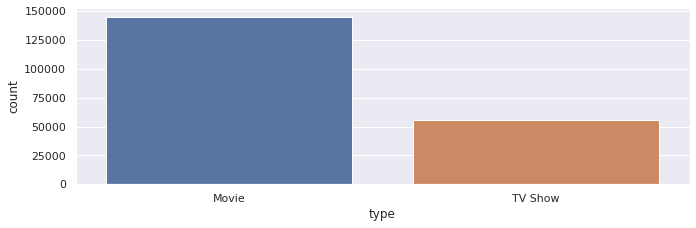

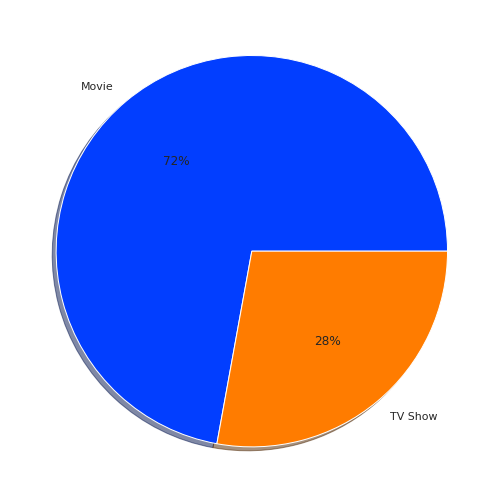

In [ ]:


plt.figure(figsize=(11,11))
sns.set_theme(style="darkgrid")
plt.subplot(311)

sns.countplot(x='type', data=preprocessed_df)


labl = list(preprocessed_df['type'].unique())

plt.figure(figsize=(9,9))
colors = sns.color_palette('bright')
plt.pie(preprocessed_df['type'].value_counts().values, labels=labl, colors=colors,
        autopct='%.f%%', shadow=True)




**From above figure it is clear that majority of content is Movies which contributes about 72% of total content type**

In [ ]:
preprocessed_df.columns

Index(['title', 'castName', 'genre', 'country', 'directorName', 'show_id',
       'type', 'date_added', 'release_year', 'rating', 'duration',
       'Month_added', 'Year_added', 'Day_Added'],
      dtype='object')

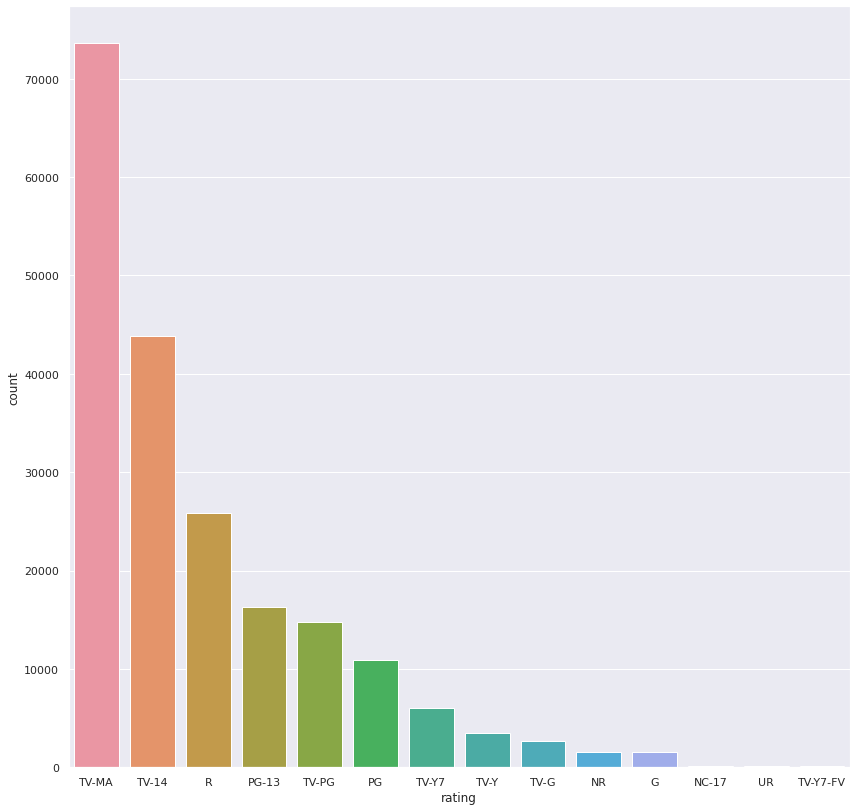

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


sns.countplot(x='rating', data=preprocessed_df,order=preprocessed_df['rating'].value_counts().index[0:15])


**From above plot it is colcuded that category "TV-MA" is most frequent occuring rating of the content followed by TV-14 and R**

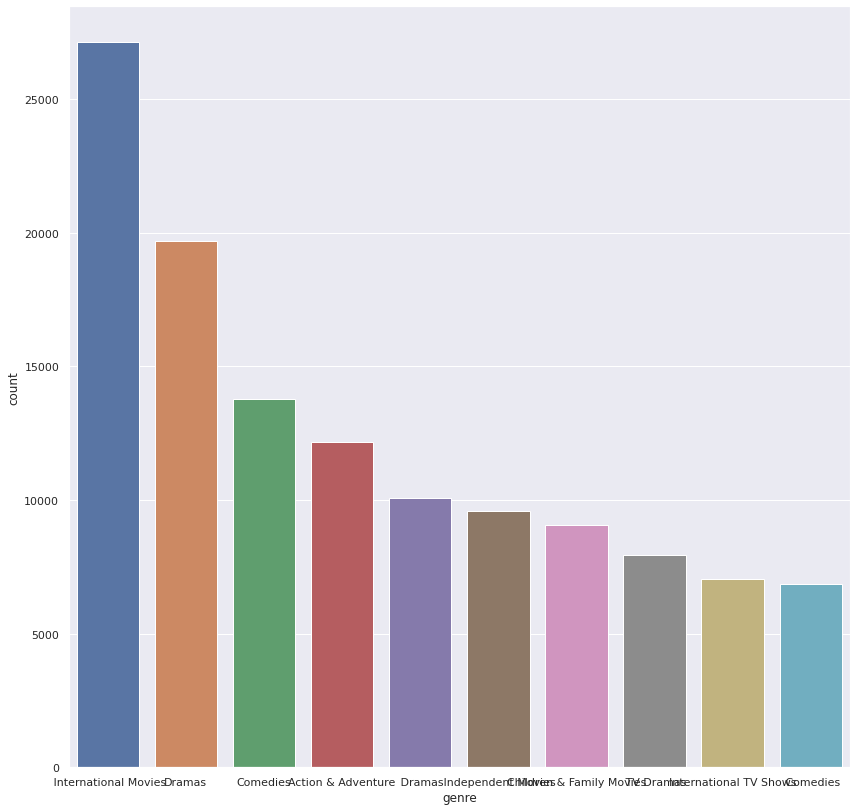

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


sns.countplot(x='genre', data=preprocessed_df,order=preprocessed_df['genre'].value_counts().index[:10])


From above plot it is concluded that "International Movies" genre is most frewquently occuring Content in NetFlix followed by "Comedies" and "Action & Adventure".

([<matplotlib.patches.Wedge at 0x7fc743905090>,
 [Text(0.35666338447623247, 1.0405725492121918, 'United States'),
  Text(-1.0953879119367655, 0.10062466090781648, 'India'),
  Text(-0.8281420635640928, -0.7240032614262221, 'United Kingdom'),
  Text(-0.40319241036854847, -1.0234431494817875, ' United States'),
  Text(0.10409836519053536, -1.0950632540472984, 'Not Available'),
  Text(0.5421144178299989, -0.9571373767546859, 'Japan'),
  Text(0.8008786281886983, -0.7540513397047904, 'South Korea'),
  Text(0.9476957706230185, -0.5584556619314047, 'Canada'),
  Text(1.0452449550048777, -0.3427287324355098, 'Spain'),
  Text(1.0939284368346989, -0.11541479577763146, 'France')],
 [Text(0.19454366425976313, 0.5675850268430137, '39%'),
  Text(-0.5974843156018721, 0.0548861786769908, '18%'),
  Text(-0.4517138528531415, -0.3949108698688483, '8%'),
  Text(-0.21992313292829915, -0.5582417178991567, '8%'),
  Text(0.05678092646756474, -0.5973072294803445, '7%'),
  Text(0.29569877336181755, -0.52207493277

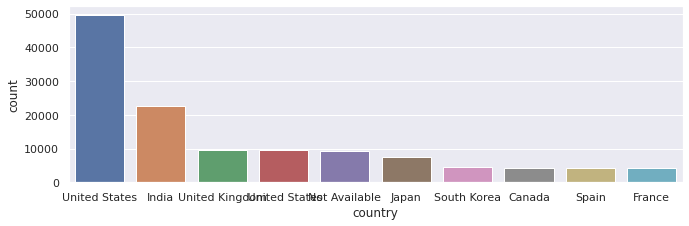

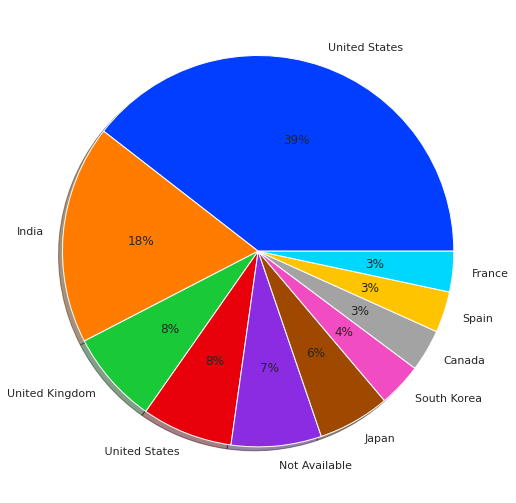

In [ ]:
plt.figure(figsize=(11,11))
sns.set_theme(style="darkgrid")
plt.subplot(311)

sns.countplot(x='country', data=preprocessed_df,order = preprocessed_df['country'].value_counts().index[:10])


labl = list(preprocessed_df['country'].value_counts().index[:10])

plt.figure(figsize=(9,9))
colors = sns.color_palette('bright')
plt.pie(preprocessed_df['country'].value_counts().values[:10], labels=labl, colors=colors,
        autopct='%.f%%', shadow=True)


From above plot we can see that United States is contributing the highes share of contents followed by Inida and United Kingdom

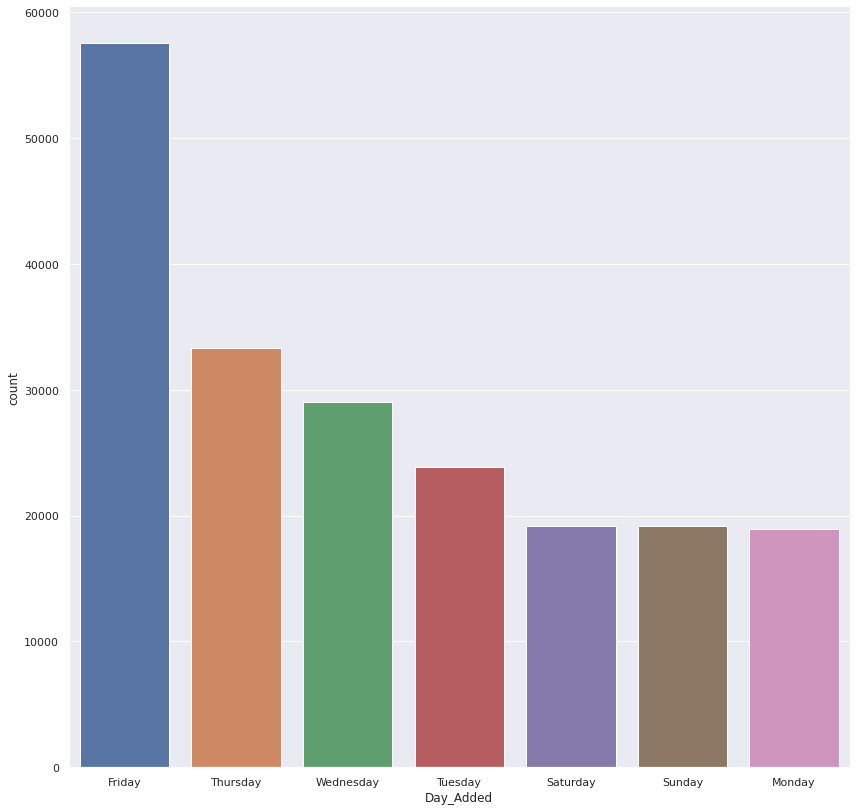

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


sns.countplot(x='Day_Added', data=preprocessed_df,order=preprocessed_df['Day_Added'].value_counts().index)


From above plot it is concluded that most of Content are added/launched on Friday followed by Thursday

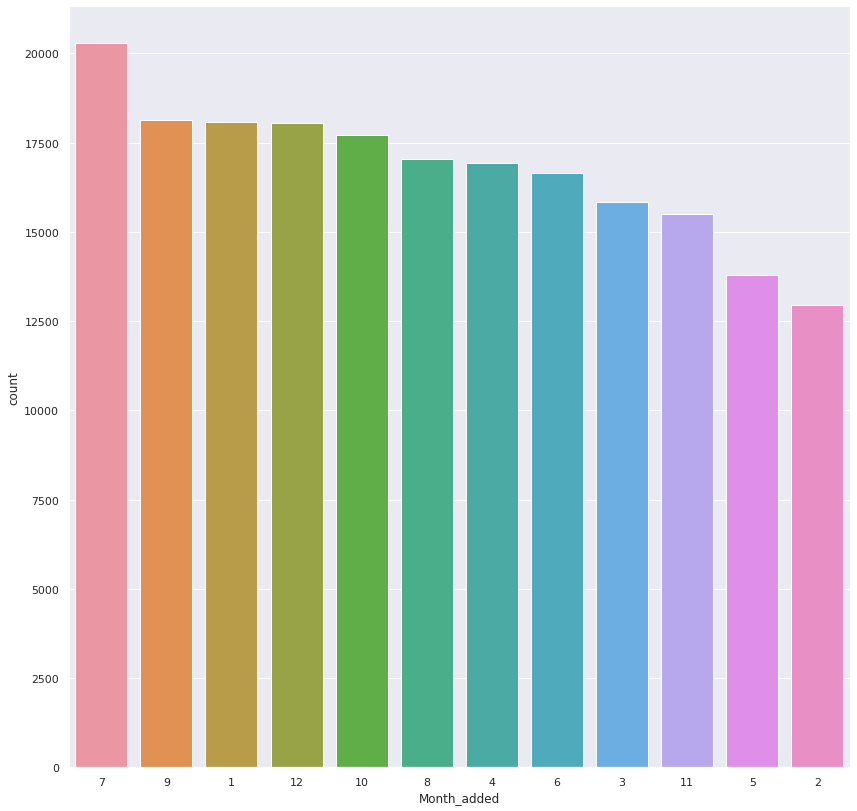

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


sns.countplot(x='Month_added', data=preprocessed_df,order=preprocessed_df['Month_added'].value_counts().index)


Based on above plot we can see that there is not much variation in terms of launch months. Still July month is having highest amount of content added followed by December-January.

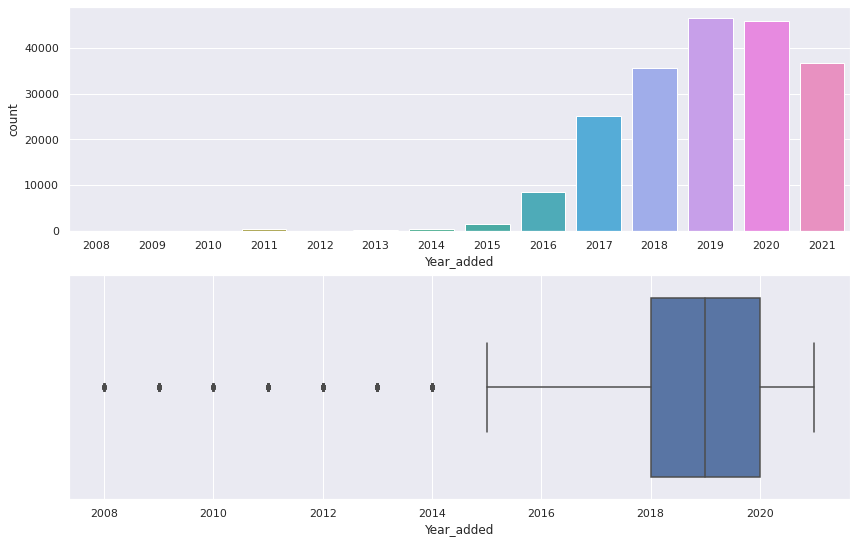

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")
plt.subplot(311)

sns.countplot(x='Year_added', data=preprocessed_df,order=sorted(list(preprocessed_df['Year_added'].unique())))


plt.subplot(312)

sns.boxplot(x='Year_added', data=preprocessed_df)

1. Based on above plot we can see that most of the content was added in last  5 years i.e from 2016 onwards.

2. It is also observed that post 2019 there is decline in number of contents added.

3. There is minimal contribution to content before 2015.

4. Content was added from as low as 2008

## Continous Variable Visual Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


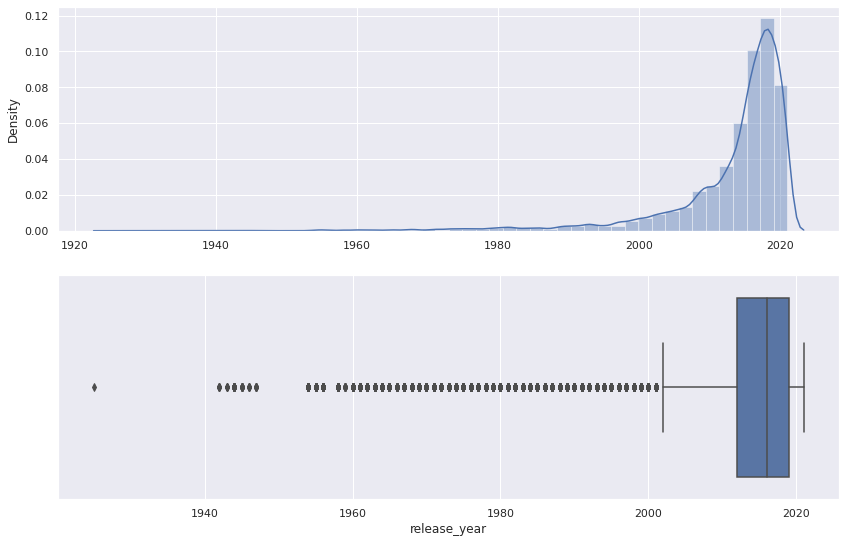

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(311)

sns.set_theme(style="darkgrid")
sns.distplot(x=preprocessed_df['release_year'])

plt.subplot(312)

sns.boxplot(x='release_year', data=preprocessed_df)

1. From above plot we can observe that most of Netflix contents relase year is after 2000. i.e Latest release contents are major portion of Netflix contents.

2. Distribution is highly  skewed towrds later release years.

3. There are very minimal Netflix movies released before year 2000

4. Earliest release dates back to year 1932



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Seasons')

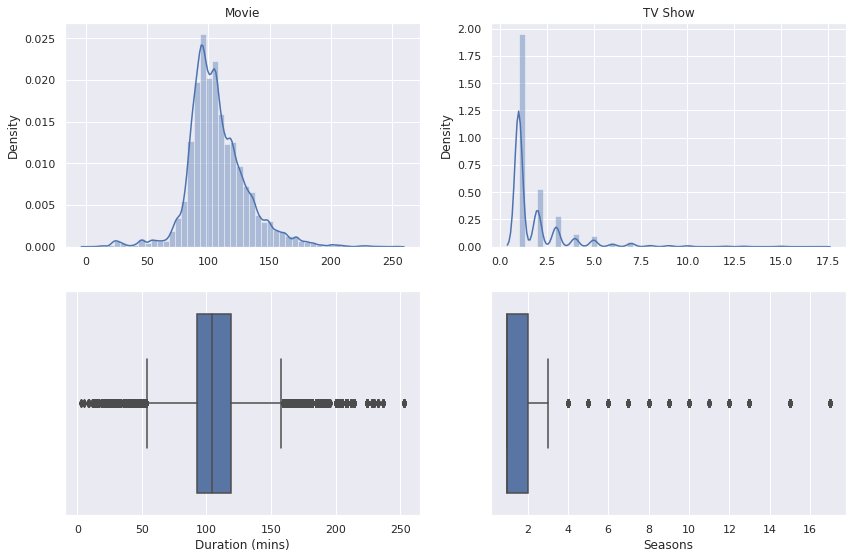

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(321)
plt.title('Movie')
sns.set_theme(style="darkgrid")
ax = sns.distplot(x=preprocessed_df['duration'][preprocessed_df['type']=='Movie'])

plt.subplot(323)

sns.boxplot(x='duration', data=preprocessed_df[preprocessed_df['type']=='Movie'])

plt.xlabel('Duration (mins)')

plt.subplot(322)
plt.title('TV Show')
sns.set_theme(style="darkgrid")
ax = sns.distplot(x=preprocessed_df['duration'][preprocessed_df['type']=='TV Show'])
# ax.title('Movie')

plt.subplot(324)

sns.boxplot(x='duration', data=preprocessed_df[preprocessed_df['type']=='TV Show'])
plt.xlabel('Seasons')

From above plot we can infer that:

1.   Movie content duration is having amost Normal Distribution with mean of about 100 minutes 
2.   **50% of Movie content duration is between 90 to 12o minutes.**
3.  **Most of the Movie contents duration (Statistical possible limits) lie between 50 to 160 minutes.**
4. Minimum duration observed is 3 minutes and maximum duration observed is more than 300 minutes.
5.  **Most of TV Shows in Netflix are having only One season.**
6.  TV Shows with more than 3 seasons are Outliers and are very rare.
7.  **Maximum number of seasons thatb TV Show had was 17**
8. TV Show seasons count distribution is skewed towards lower number of seasons 



In [ ]:
cast = preprocessed_df.groupby('title').apply(lambda x: list(x['castName'].unique())).explode()
cast = cast.reset_index()

In [ ]:
cast

,title,0
0,#Alive,Park Shin-hye
1,#Alive,Yoo Ah-in
2,#AnneFrank - Parallel Stories,Helen Mirren
3,#AnneFrank - Parallel Stories,Gengher Gatti
4,#FriendButMarried,Rendi Jhon
...,...,...
64136,최강전사 미니특공대 : 영웅의 탄생,Shin Yong-woo
64137,최강전사 미니특공대 : 영웅의 탄생,Jeon Tae-yeol
64138,최강전사 미니특공대 : 영웅의 탄생,Lee So-young
64139,최강전사 미니특공대 : 영웅의 탄생,Um Sang-hyun


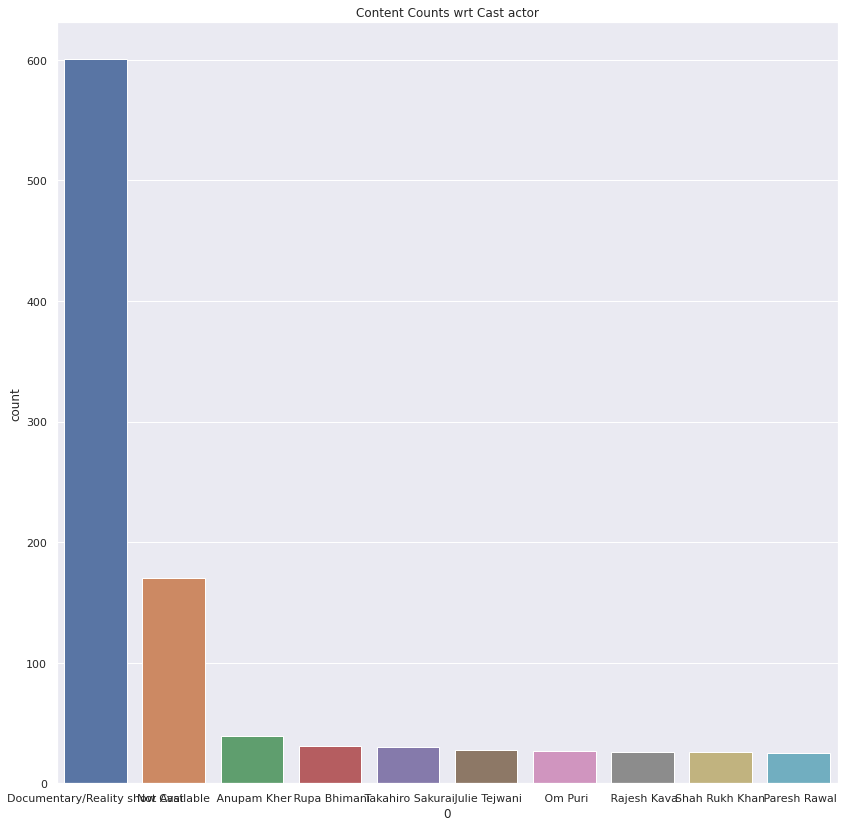

In [ ]:
plt.figure(figsize=(14,14))


plt.title('Content Counts wrt Cast actor')
sns.set_theme(style="darkgrid")

sns.countplot(x=0, data=cast,order=cast[0].value_counts().index[:10])

Following can be inferred form the graph:
1.   There are lot of Documentaries or Docuseries in the Netflix contents which do not have defined cast. Its all about Real life characters and incidents.
2.   There are lot of contents for which we do not have the Cast Names.
3.  We can se  that in top 10 cast in terms of content counts, 7 are Indian Casts. So Netflix has majority of contents featuring Indian Cast.
4. Anupam Kher is featuring in highest number of contents.
5. Apart from him, ShahRukh Khan, Julie Tejwani, Boman Inrani are other notable Indian cast featuring in Top 10


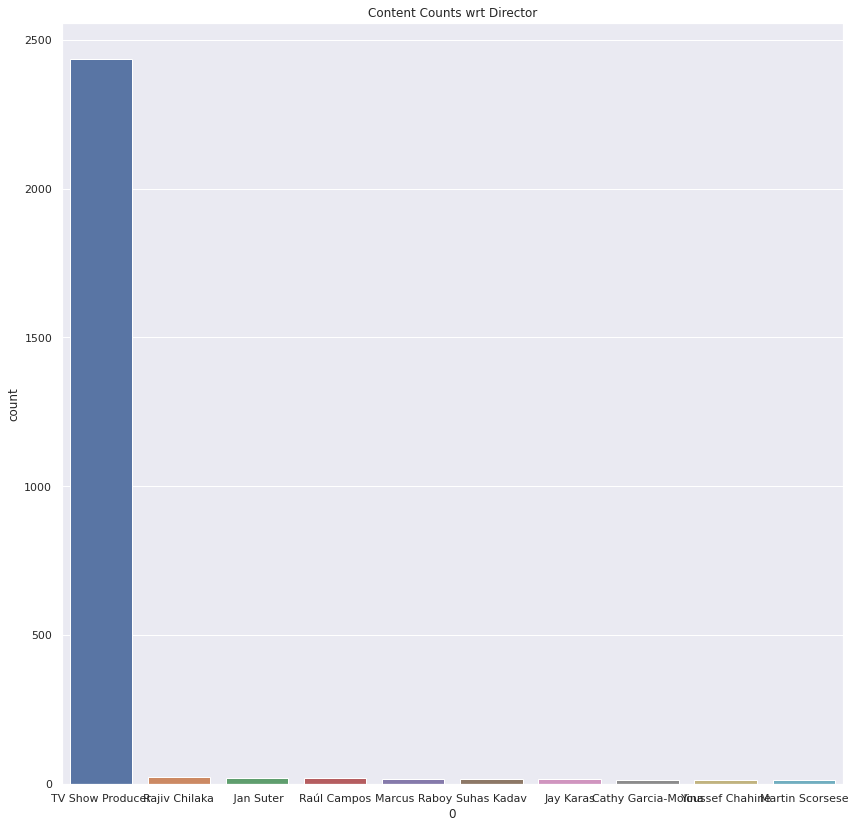

In [ ]:
plt.figure(figsize=(14,14))


plt.title('Content Counts wrt Director')
sns.set_theme(style="darkgrid")

required_df = preprocessed_df.groupby('title').apply(lambda x: list(x['directorName'].unique())).explode()
required_df = required_df.reset_index()

sns.countplot(x=0,data=required_df,order= required_df[0].value_counts().index[:10])



1.   There are lot of contents from TC Show producers
2.   Rajiv Chikala is having the highest numbver of contents followed by Jan Sulter



# Evaluation Metric 4 and 6: Exploration Questions

1.   Country wise popular genres analysis
2.   Countrywise duration analysis
2.   Genre wise , country wise rating
     Rating distribution
4.   trend of number of movies added in year
5.   Most common Genre (count of distinct movies for each Genre)
6. Most popular director in Netflix till now'
7. Moat popular Cast in Netflix
8. Movies with long runtime
9. Impact of launch time and relation with each country
10. checking this distribution trend of tv shows and movies over years
  


# Exploration on Genre popularity( seeing  countrywise)



In [ ]:
genre_df['genre'].value_counts()

 International Movies        2582
Dramas                       1587
Comedies                     1186
Action & Adventure            851
 Dramas                       815
                             ... 
 Classic & Cult TV              6
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Name: genre, Length: 72, dtype: int64

**We can see that International Movies are most popular genres across globe for Netflix.** But lets try to see it countrywise

In [ ]:
genre_df = preprocessed_df[['title','country','Year_added']].merge(genre_df,how='inner',left_on= ['title'],right_on=['title']).drop_duplicates()


Since US, India and Canada hols highest number of contents lets see the most popular genres in these countruies

In [ ]:
l = ['United States','India','Canada','United Kingdom','Japan']

for item in l:

  print(item," : ",genre_df['genre'][genre_df['country']==item].value_counts().index[0])

United States  :  Dramas
India  :   International Movies
Canada  :   International Movies
United Kingdom  :  British TV Shows
Japan  :  Anime Series


Top insights are:
1.   **In United states which accounts for 50% of content most popular genre is "Dramas"**
2.  **India and Canada contents are having popular demand for "International Movies"**
3. **Intersetingly in Japan most popular Genre is "Aninme Series"** 

# Exploration on Duration content

We have seen earlier that when we analysed duration column , 50% of the Movie contents lie between **90 to 120 minutes** and almost all content lie between **50 to 160 minutes**. Checking if this holds True and checing Summary stas for top5 countries (in terms of Content numbers)

In [ ]:
duration_df  = preprocessed_df[['title','country','Year_added','duration','type']].drop_duplicates()

                median    max        mean   min
country                                        
Canada            91.0  158.0   88.704918  19.0
India            127.0  228.0  125.414006  29.0
Japan            100.0  212.0  103.195652   5.0
United Kingdom    97.0  208.0   96.351648  15.0
United States     93.0  209.0   92.671386   3.0


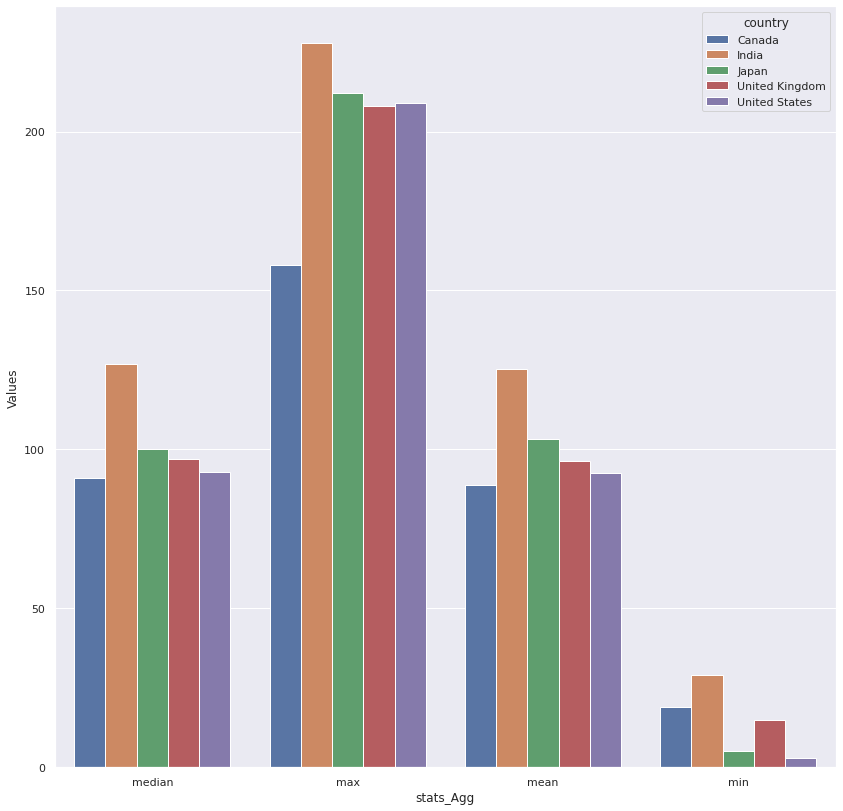

In [ ]:
l = ['United States','India','Canada','United Kingdom','Japan']
s = duration_df[(duration_df['country'].isin(l))&(duration_df['type']=='Movie')].groupby('country')['duration'].agg({'mean','max','min','median'})

print(s)

s.reset_index(inplace=True)

s = pd.melt(s,id_vars=['country'],var_name='stats_Agg',value_name='Values')
plt.figure(figsize = (14,14))
sns.barplot(x='stats_Agg',y='Values',hue='country',data=s)


1.   In US and UK, maximum content duration is almost same and apprximately equal to 208 minutes
2.  India has highest Movie duration contents out of all these countries. It has overall highes maximum (228 minutes), minimum(29 minutes) and median duration of Contents(29 minutes).
3. Canadians prefer to watch shorter movie content duration compared to other countries as evident by above stats



In [ ]:
import numpy as np

In [ ]:
duration_df[(duration_df['country'].isin(l))&(duration_df['type']=='Movie')].groupby('country').apply(lambda x :(np.percentile(x['duration'],25),np.percentile(x['duration'],75)))

country
Canada              (84.0, 99.5)
India             (109.0, 142.0)
Japan              (91.0, 116.0)
United Kingdom     (87.0, 110.0)
United States      (83.0, 105.0)
dtype: object

1.   **In US, 50% of Movie duration content lies between 83 to 105 minutes.**
2.   UK and Canada also almost follows similar duration distribution
3.   **India has 50% of the contents between 109 to 142 minutes.**



In [ ]:
duration_df[duration_df['duration']==duration_df['duration'].max()]

,title,country,Year_added,duration,type
175677,The School of Mischief,Egypt,2020,253.0,Movie


Text(0, 0.5, 'Avergae Movie Durations(mins)')

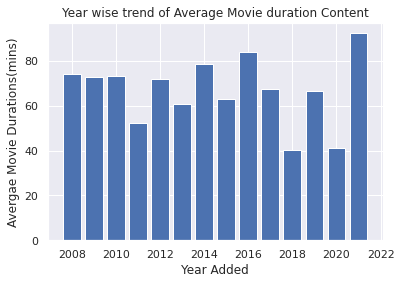

In [ ]:
plt.bar(duration_df['Year_added'].unique(),duration_df.groupby('Year_added').apply(lambda x:x['duration'].mean()))
plt.title('Year wise trend of Average Movie duration Content')
plt.xlabel('Year Added')
plt.ylabel('Avergae Movie Durations(mins)')

We can see that there is no clear trend in Movie duration wrt Year. Year 2021 has contents having highest Movie durations. Checking the analysis top5 country wise

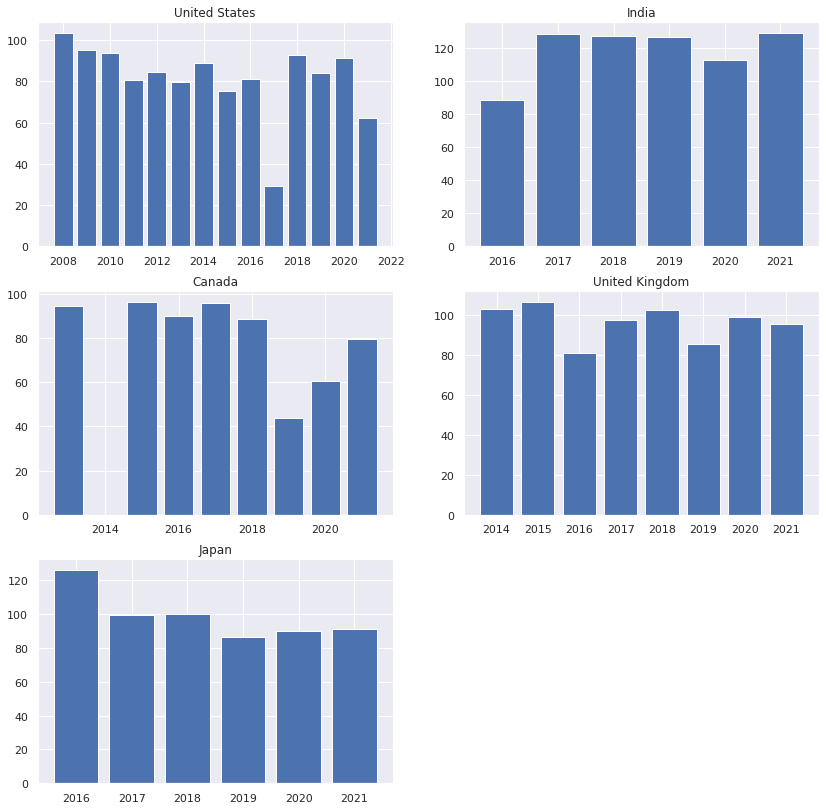

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']

for i in range(len(l)):
  
  
  y = 321+i
  
  plt.subplot(y)
  plt.title(l[i])

  ax = plt.bar(duration_df['Year_added'][(duration_df['type']=='Movie')&(duration_df['country']==l[i])].unique(),duration_df[(duration_df['type']=='Movie')&(duration_df['country']==l[i])].groupby('Year_added').apply(lambda x:x['duration'].mean()))


1.   There is no clear trend visible for each country except Japan
2.   **In recent years, Japan have seen more contents of shorter Movie duration compared to previous years.**



## Doing Analysis On Seasons Number

                median   max  min  Mode
country                                
Canada             2.0  13.0  1.0   1.0
India              1.0   3.0  1.0   1.0
Japan              1.0   9.0  1.0   1.0
United Kingdom     1.0  10.0  1.0   1.0
United States      1.0  17.0  1.0   1.0


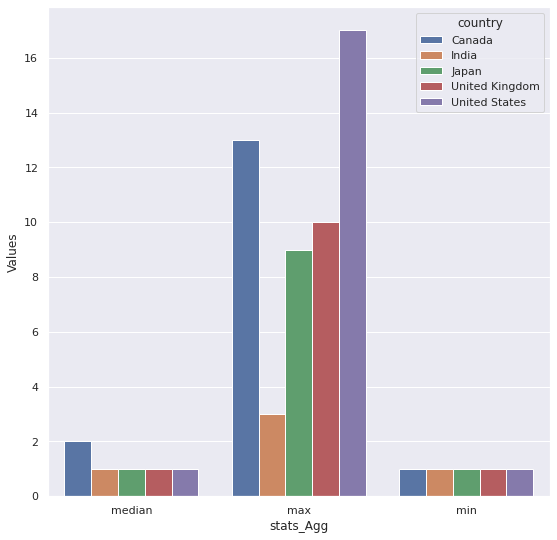

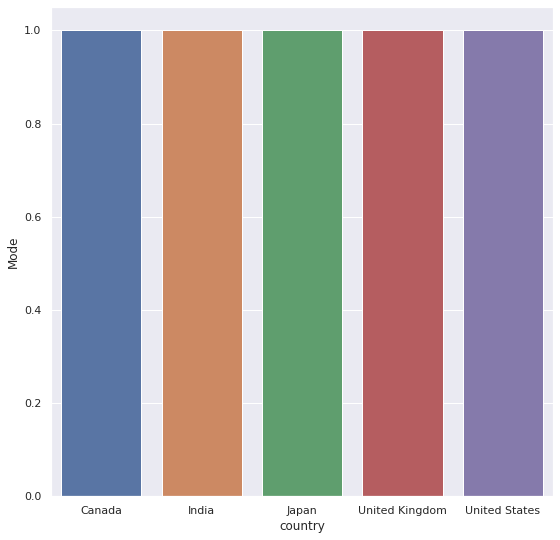

In [ ]:
l = ['United States','India','Canada','United Kingdom','Japan']
s = duration_df[(duration_df['country'].isin(l))&(duration_df['type']=='TV Show')].groupby('country')['duration'].agg({'max','min','median'})

s['Mode'] = duration_df[(duration_df['country'].isin(l))&(duration_df['type']=='TV Show')].groupby('country')['duration'].apply(lambda x: x.value_counts().index[0])
print(s)

s.reset_index(inplace=True)

t = pd.melt(s[['median','max','min','country']],id_vars=['country'],var_name='stats_Agg',value_name='Values')
plt.figure(figsize = (9,9))
sns.barplot(x='stats_Agg',y='Values',hue='country',data=t)
plt.figure(figsize = (9,9))
sns.barplot(x='country',y='Mode',data=s)

Top Insights are: 

1.   **Most Usually there is only 1 season realeased for TV shows for these countries which is also true for all other countries as well as we seen in our earlier analysis. Most usual number of seasion duration wss coming out to be 1**
2.   **US is having the highest number of Maximum season TV shows follwed by Canda and UK**
3. **India is having releatively the lowest maximum seasons of TV Shows which is 3.**
3. Maximum number of TV Shows in US is 17 ,for Canda it is 13 and for UK it is 10 



## Exploration of Genre wise Movie Duration



In [ ]:
genre_df = genre_df.merge(duration_df,how='left',left_on= ['title','country','Year_added'],right_on = ['title','country','Year_added'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

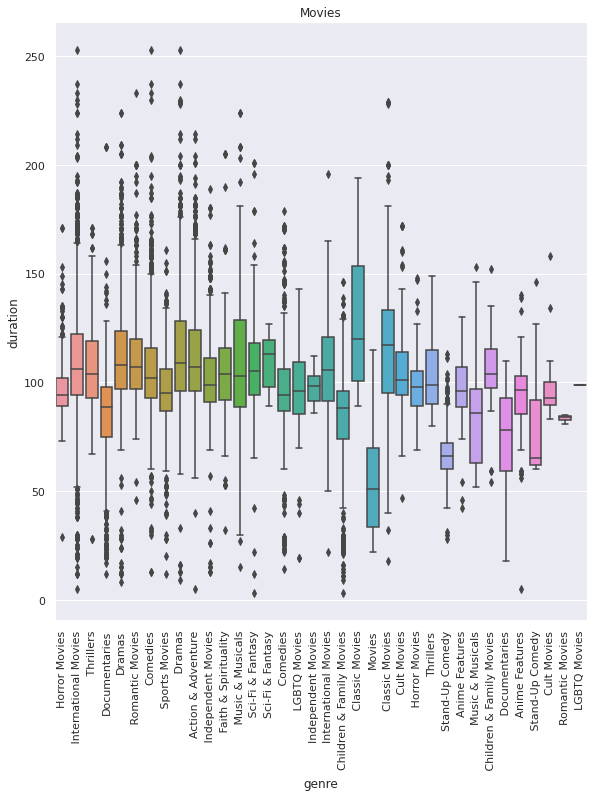

In [ ]:
plt.figure(figsize=(21,11))
plt.subplot(121)
plt.title('Movies')
sns.boxplot(x = 'genre',y='duration',data=genre_df[genre_df['type']=='Movie'])
plt.xticks(rotation=90)

1.  There is no clear pattern or relation visible from above plot for Duration and Genre.
2. Categories like Standup Comedy, Documentaries, Music and Commerical are having shorter Duration as compared to Other Movie Genres

In [ ]:
genre_df[genre_df['duration']>=180].sort_values(by=['duration'])

,title,country,Year_added,genre,duration,type
2910,Blue Is the Warmest Color,Spain,2016,International Movies,180.0,Movie
2909,Blue Is the Warmest Color,Spain,2016,Independent Movies,180.0,Movie
2908,Blue Is the Warmest Color,Spain,2016,Dramas,180.0,Movie
2907,Blue Is the Warmest Color,Belgium,2016,International Movies,180.0,Movie
2906,Blue Is the Warmest Color,Belgium,2016,Independent Movies,180.0,Movie
...,...,...,...,...,...,...
13222,No Longer kids,Egypt,2020,International Movies,237.0,Movie
13221,No Longer kids,Egypt,2020,Dramas,237.0,Movie
20479,The School of Mischief,Egypt,2020,Dramas,253.0,Movie
20478,The School of Mischief,Egypt,2020,Comedies,253.0,Movie



1.  ** Maximum Duration time is 253 minutes for film "The school of Mischief" released in Egypt country**
2.   There are 63 movies having duration more than 3 hours.

In [ ]:
u = genre_df['country'][genre_df['duration']>180].value_counts()
v = genre_df['country'].value_counts()

z = pd.Series(index=u.index)
for index in z.index:
  z[index]=u[index]/v[index]*100

z.sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


 Liechtenstein     100.000000
 Morocco            16.666667
 Switzerland         8.333333
Romania              7.692308
New Zealand          5.882353
 Italy               4.687500
Egypt                4.013378
Netherlands          3.389831
 United Kingdom      2.925532
Japan                2.825746
 Japan               1.754386
India                1.428061
Italy                1.298701
Not Available        0.825206
Nigeria              0.738007
 Germany             0.735294
 United States       0.589391
 France              0.478469
United States        0.403014
United Kingdom       0.144196
dtype: float64


1.  Leichtenstein is having all te movie contents duration more than 3 hours.
2.   Morocco, Romania and Switzerland are also having the more than close to 10% of movie cintent having duration more than 3 hours.
3. India is having 1.33% of movie content duration of more than 3 hours whereas for US it s a negligible 0.34%.



## Checking Relationship of Duration with Release Year and month added

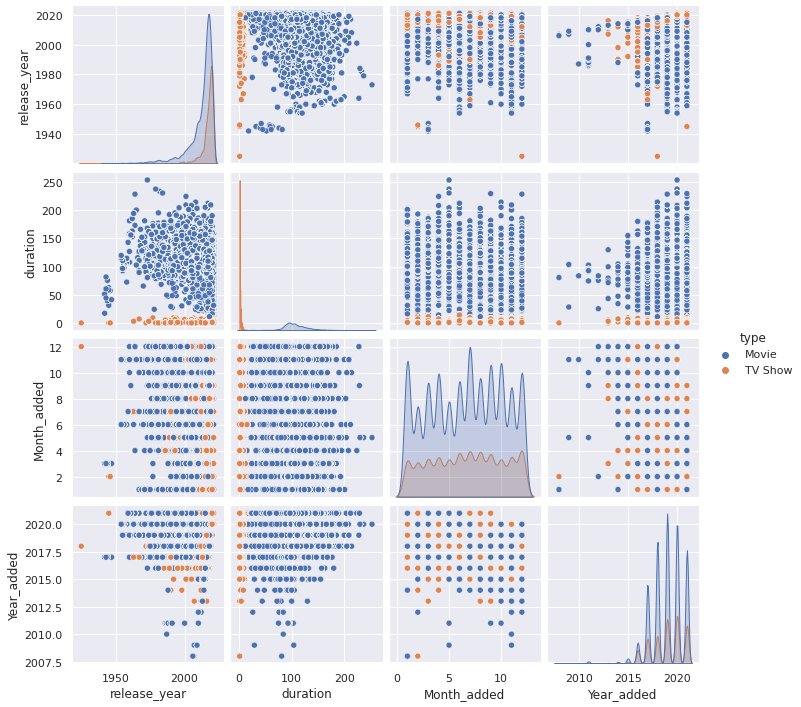

In [ ]:
sns.pairplot(preprocessed_df,hue='type')

We get following insights

1.   **TV Shows which are added to Netflix content are quite new release as compared to Movies which still have significant weightage towrds older relase date.**
2.  There is no prefernce of content in terms of month in which it is launched.It is same for Movies and TV Show type

3. Before 2016, content which were there in Netflix were consisiting primarily of TV Shows. But after 2016 this weightage got skewed towards Movies type and there is good content % of Movies over TV Show (60 to 40 ratio).**In nutshell, in latest additions Movies type is dominating over TV shows type.**



# Getting Insights from Rating Column



In [ ]:
genre_df = genre_df.merge(preprocessed_df[['genre','title','country','Year_added',	'duration',	'type','rating']],how='left',left_on=['title','country',	'genre','Year_added',	'duration',	'type'],right_on=['title','genre','country',	'Year_added',	'duration',	'type'])



1.   We already have seen earlier that "TV-MA" is the most popular rating content in Netflix follower=d by "TV-R"
2.   Now Let us try analyse the rating wrt country,see the trend wrt year and see genre wise popular Rating



## Country wise Popular Rating
 we are gonna analyze foir top 5 countries as these countries almost account for 80% of total content

In [ ]:
temp = preprocessed_df.groupby(['title']).apply(lambda x:x['rating'].unique()).explode().reset_index().rename(columns={0:'rating'})
del genre_df['rating']
temp

,title,rating
0,#Alive,TV-MA
1,#AnneFrank - Parallel Stories,TV-14
2,#FriendButMarried,TV-G
3,#FriendButMarried 2,TV-G
4,#Roxy,TV-14
...,...,...
8604,忍者ハットリくん,TV-Y7
8605,海的儿子,TV-14
8606,마녀사냥,TV-MA
8607,반드시 잡는다,TV-MA


In [ ]:
genre_df = genre_df.merge(temp,how='left',left_on='title',right_on='title')

In [ ]:
genre_df.drop_duplicates(inplace=True)

In [ ]:
del genre_df['genre_y']
del genre_df['country_y']
genre_df.rename(columns = {'genre_x':'genre','country_x':'country'},inplace=True)

<Figure size 1008x1008 with 0 Axes>

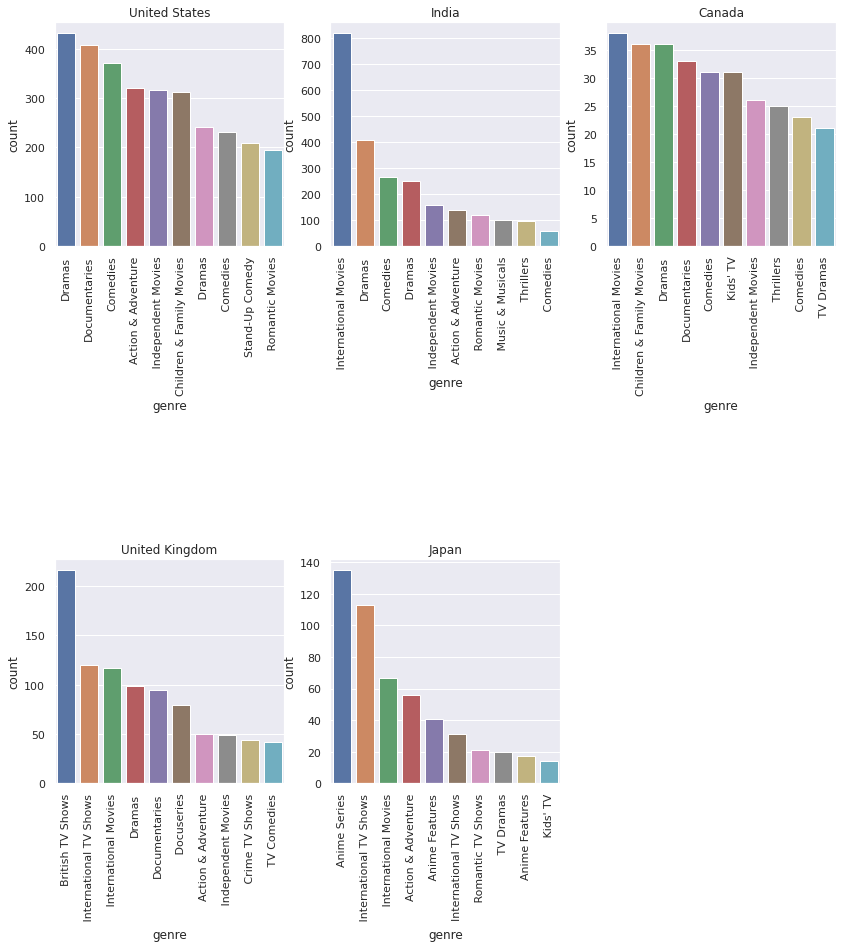

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']




plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']

for i in range(len(l)):
  
  if i<=2:
    y = 331+i
  else:
    y=331+i+3
  
  plt.subplot(y)
  plt.title(l[i])

  ans_df = genre_df[genre_df['country']==l[i]]

  ax = sns.countplot(x = 'genre',data=ans_df,order=ans_df['genre'].value_counts().index[:10])
  plt.xticks(rotation =90)


From above graph we can infer that : 

1.   **India have very clear and distinct taste towards "International Movies" Genre**
2.   **In US and Canada there is no as such clear distinction but still "Drama" genre is most popular genre in US.**
3. **In Japan there is a high likings towards "Anime Series" genre.**
4. **In UK , there is a very high liking towrds "British TV Shows".** 
5. "International Movies" are among topt 10 likings for each of these countries




In [ ]:
def fun(x):
  return x.nunique()
genre_df['rating'] = genre_df['rating'].astype('str') 
ans_df = genre_df.pivot_table(index = 'genre',columns = 'rating',values='title',aggfunc = fun)
ans_df = ans_df.fillna(0)
cols = list(genre_df['rating'].value_counts().index[:10])

ans_df = ans_df[cols]

Craeted Dataframe of Genre vs Rating for top 10 rating type contents in above code. With this data we will be checking the content distribution wrt to a specific combination of Genre and Rating.

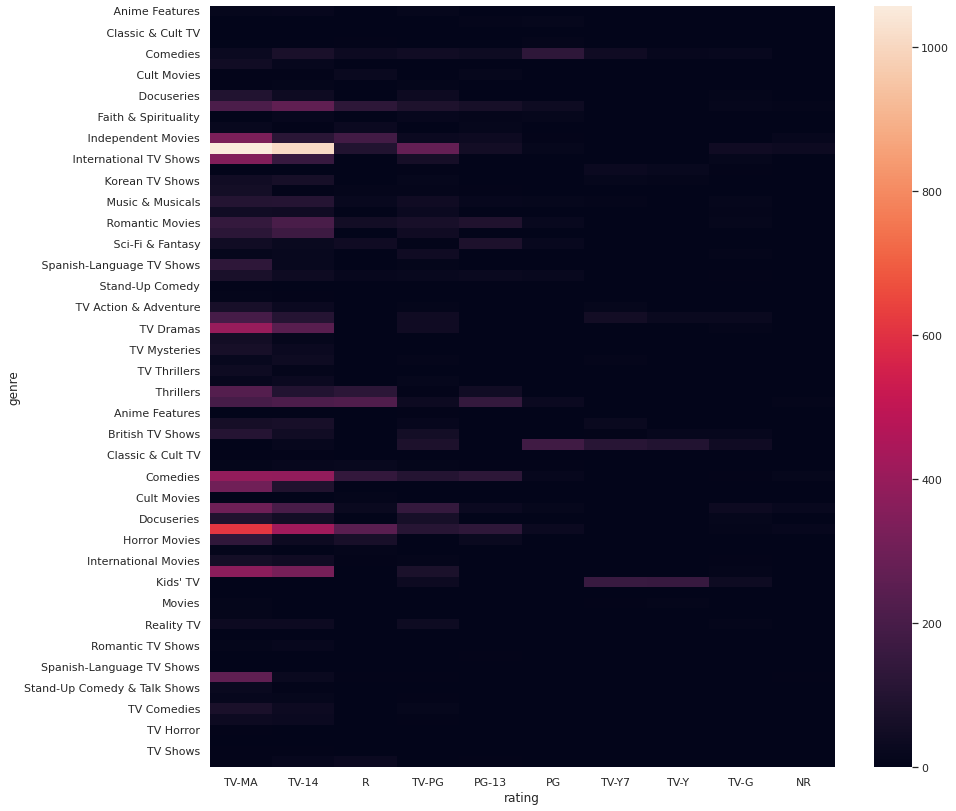

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(ans_df)

From above plot we infer that:

1.   **"Independent Movies" with rating type"TV-MA" or"TV-14" are the most popular content types.**
2.   **Second Most popular content Type is "Docuseries" with rating type"TV-MA".**



Now checking this distribtuion for each Countrywise

531 United States


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


533 India
537 Canada
539 United Kingdom
543 Japan


<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

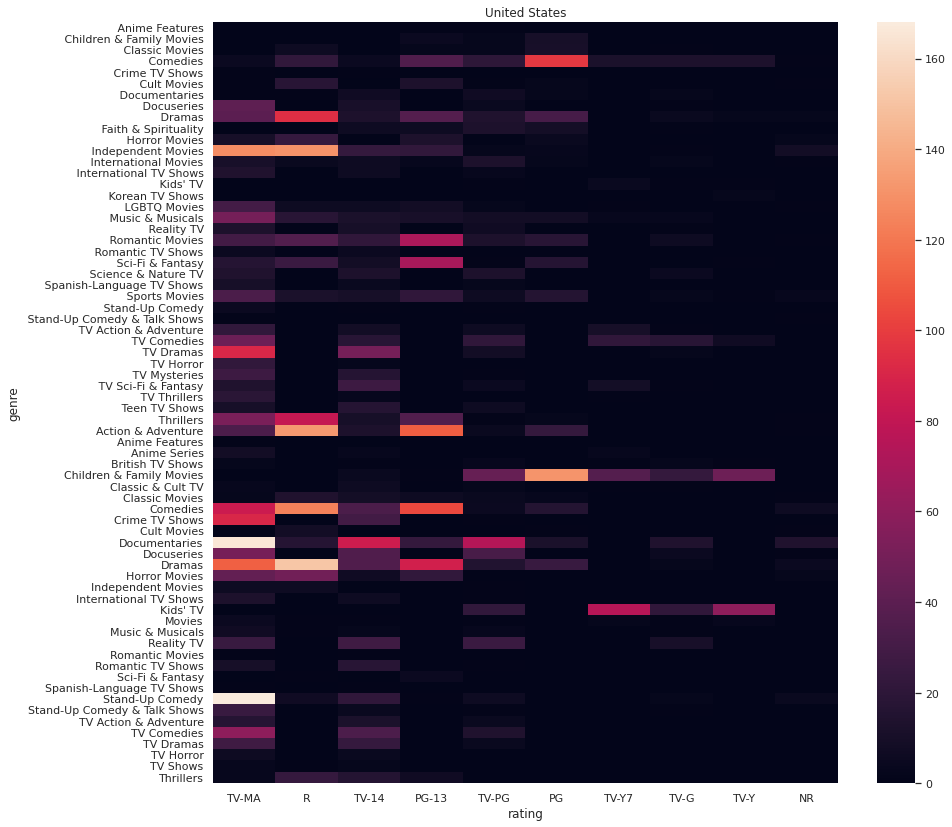

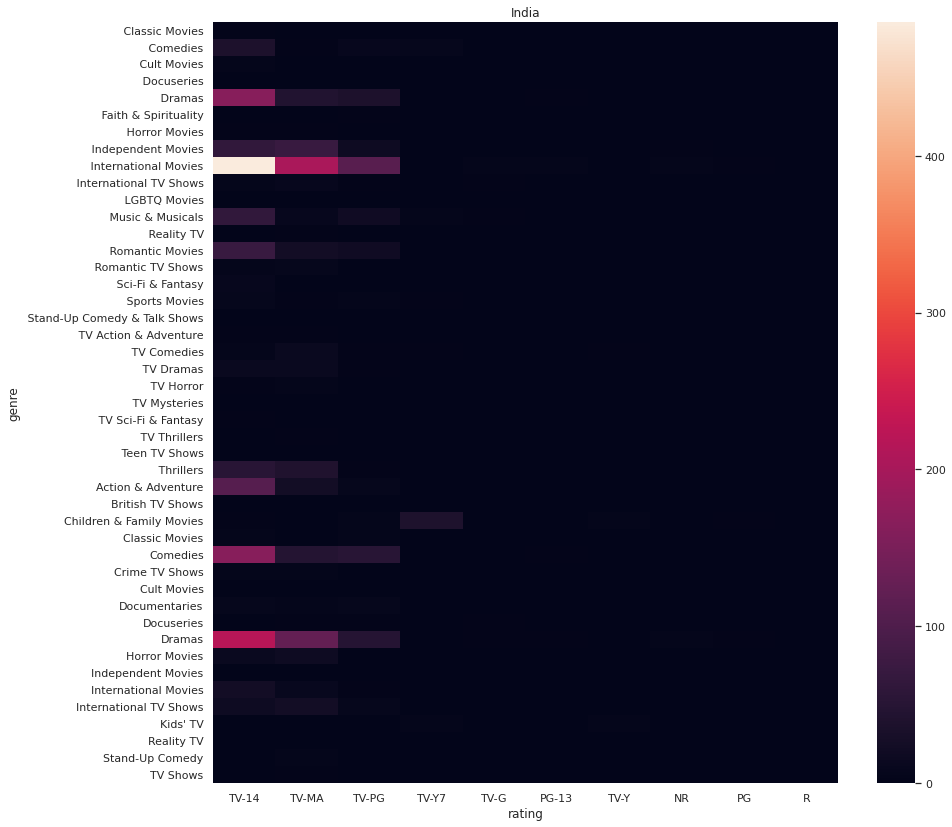

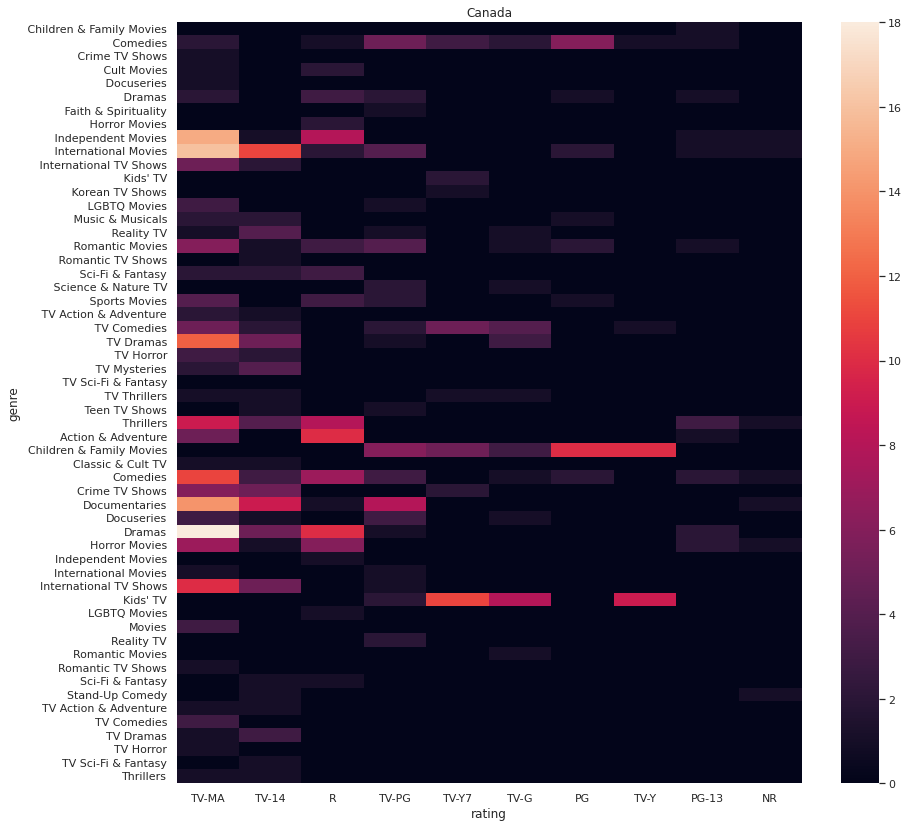

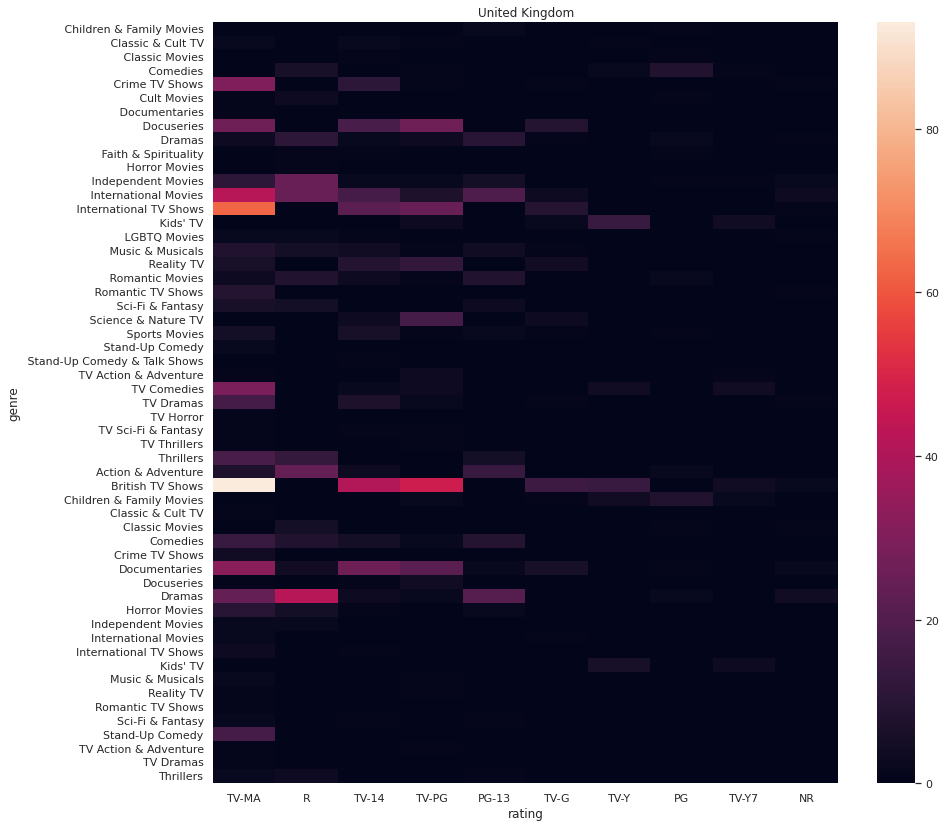

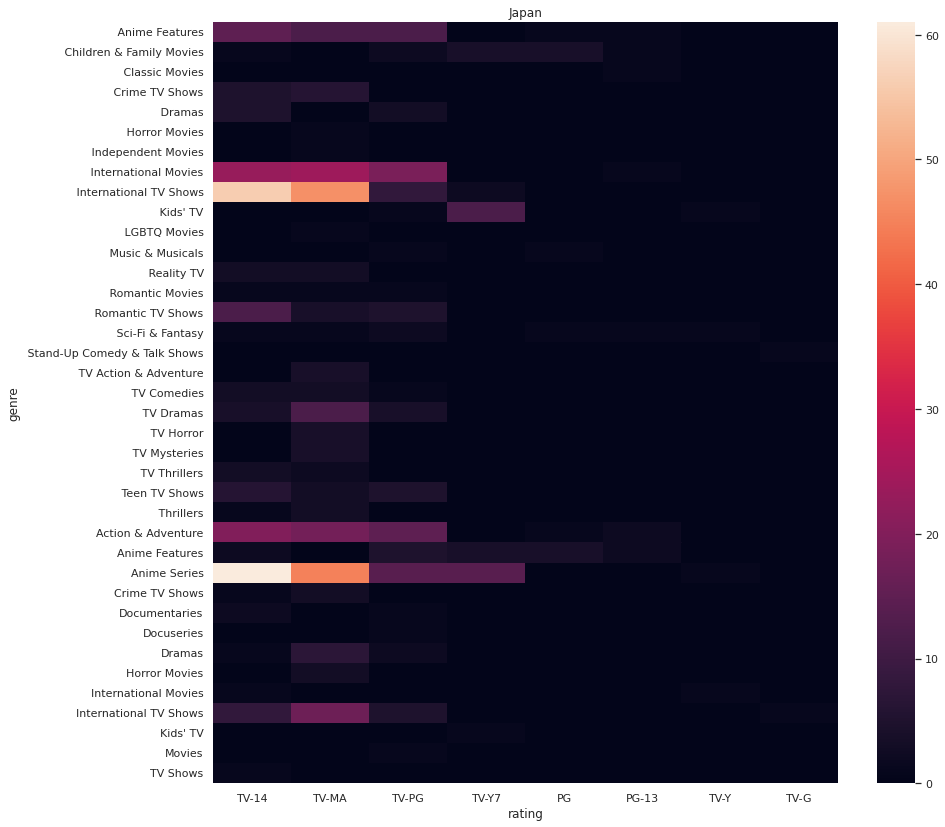

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']




plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']

for i in range(len(l)):
  
  if i<=1:
    y = 531+i*2
  elif i>=2 and i<=3:
    y=533+i*2

  else:
    y=535+2*i
  
  plt.figure(figsize=(14,14))
  plt.title(l[i])

  print(y,l[i])

  ans_df = genre_df[genre_df['country']==l[i]]

  def fun(x):
    return x.nunique()

  ans_df['rating'] = ans_df['rating'].astype('str') 
  ans_df = ans_df.pivot_table(index = 'genre',columns = 'rating',values='title',aggfunc = fun)
  ans_df = ans_df.fillna(0)

 

  cols = list(genre_df['rating'][genre_df['country']==l[i]].value_counts().index[:10])

  ans_df = ans_df[cols]

  sns.heatmap(ans_df)
  # plt.xticks(rotation =90)

We get following insights from the above plot.

1.   **In US, Documentaries and Standup Comedies with "TV-MA" ratings are hot favourites follwed by Drama with category "R"**.
2.   **In India, International movies with "TV-14" rating are hot favourite followed by "Dramas" with same categor"**y.
3. **In UK, British TV Shows with "TV-MA" rating are top favourites followed by International TV Shows with same rating.**
4. **In Japan , Anime Series with "TV-14" and "TV-MA" rating followed by International TV Shows of similar rating are top favorites content.**

5. **In Canada Dramas with category "TV-MA" category are top favourite contents**





## Checking trend of Rating type popularity over years

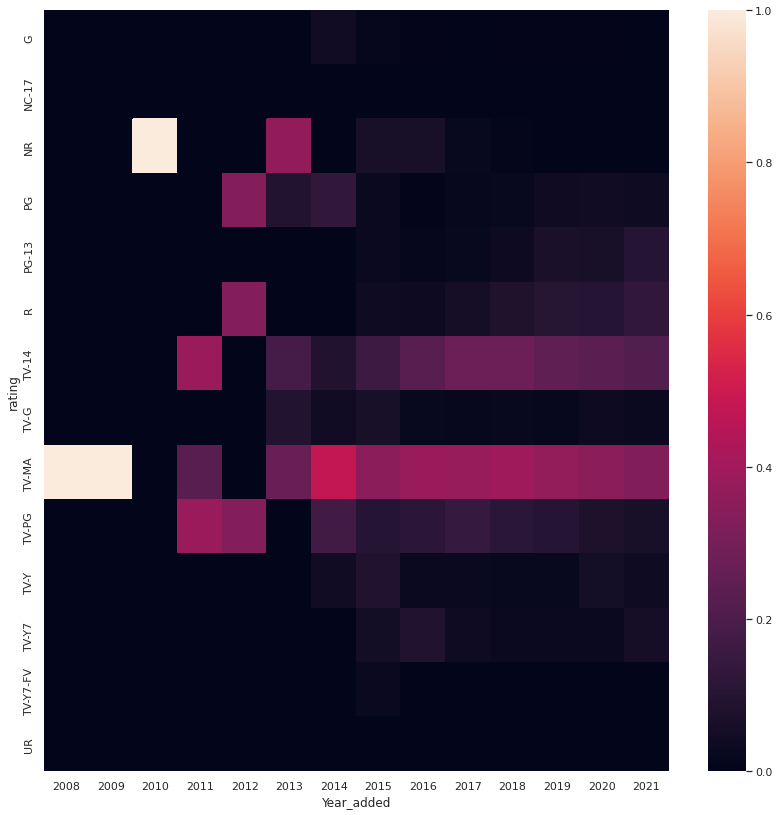

In [ ]:
# bar chart 1 -> top bars (group of 'smoker=No')

genre_df['Year_added']  =genre_df['Year_added'].astype(str)

plt.figure(figsize=(14,14))
def fun(x):

  return x.nunique()


ans_df = genre_df.pivot_table(index='rating',columns = 'Year_added',values='title',aggfunc=fun)
ans_df=ans_df.fillna(0)
ans_df =ans_df.apply(lambda x: x/x.sum(),axis=0)
ans_df
sns.heatmap(ans_df)




From above plot we get insights that : 

1. **In recent years, content distribution is seen growing to other Ratings type as well.**
2. **But distribution is more concentrated towrds TV-MA for all these years.**



# Directors and Cast impact on content likings

We have seen before there are lot of contents which are documentaries or TV shows in which there are all real characters and show is made by producers of the show rather thanhaving a specific Director.

Lets see the impact of cast director combination for different countries

In [ ]:
cast_df = preprocessed_df.groupby(['title','Year_added','country','rating']).apply(lambda x:x['castName'].unique()).explode().reset_index()

In [ ]:
ans_df = director_df.merge(cast_df,how='inner',left_on='title',right_on='title')

In [ ]:
ans_df = ans_df.rename(columns={0:'cast'})

In [ ]:
ans_df

,title,directorName,Year_added,country,rating,cast
0,#Alive,Cho Il,2020,South Korea,TV-MA,Park Shin-hye
1,#Alive,Cho Il,2020,South Korea,TV-MA,Yoo Ah-in
2,#AnneFrank - Parallel Stories,Anna Migotto,2020,Italy,TV-14,Helen Mirren
3,#AnneFrank - Parallel Stories,Anna Migotto,2020,Italy,TV-14,Gengher Gatti
4,#AnneFrank - Parallel Stories,Sabina Fedeli,2020,Italy,TV-14,Helen Mirren
...,...,...,...,...,...,...
88715,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,2018,Not Available,TV-Y7,Shin Yong-woo
88716,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,2018,Not Available,TV-Y7,Jeon Tae-yeol
88717,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,2018,Not Available,TV-Y7,Lee So-young
88718,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,2018,Not Available,TV-Y7,Um Sang-hyun


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

<Figure size 1008x1008 with 0 Axes>

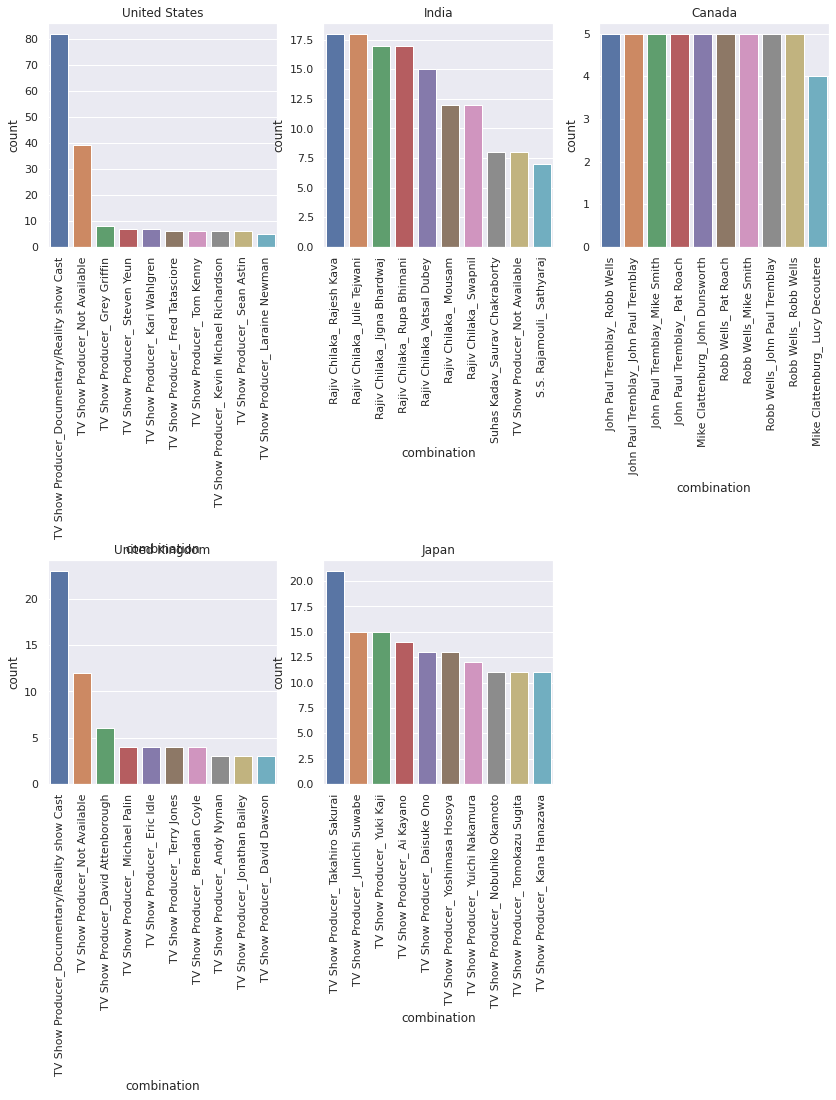

In [ ]:
plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']




plt.figure(figsize=(14,14))
sns.set_theme(style="darkgrid")


l = ['United States','India','Canada','United Kingdom','Japan']

for i in range(len(l)):
  
  if i<=2:
    y = 331+i
  else:
    y=  334+i

  
  
  plt.subplot(y)
  plt.title(l[i])
  ans_dff = ans_df[ans_df['country']==l[i]]

  ans_dff['combination'] = ans_dff['directorName']+'_'+ans_dff['cast']

  sns.countplot('combination',data=ans_dff,order=ans_dff['combination'].value_counts().index[:10])
  plt.xticks(rotation =90)

  


From above plot we get insights that :

1. **In US and UK , there is a high popularity of TV ahows and documentaries where there are real characters.**
2. **In India , Mr. Rajiv Chikala combinations with  Rajesh Kava, Julie Tejwani and others are having most number of contents which basically belongs to Child TV Show category**
3. Canada do not have any preference of any director and Cast combination.
4.**In Japan , combination of Anime TV Series producer with voice over artist Takahiro Sakurai is most popular combination.**

## Checking how cast and Genre combination affect content distribution

In [ ]:
ans_df = preprocessed_df[['title','country','genre','castName','directorName','Year_added']].drop_duplicates()
ans_df

,title,country,genre,castName,directorName,Year_added
0,#Alive,South Korea,Horror Movies,Park Shin-hye,Cho Il,2020
1,#Alive,South Korea,International Movies,Park Shin-hye,Cho Il,2020
2,#Alive,South Korea,Thrillers,Park Shin-hye,Cho Il,2020
3,#Alive,South Korea,Horror Movies,Yoo Ah-in,Cho Il,2020
4,#Alive,South Korea,International Movies,Yoo Ah-in,Cho Il,2020
...,...,...,...,...,...,...
200991,최강전사 미니특공대 : 영웅의 탄생,Not Available,Children & Family Movies,Shin Yong-woo,Young Jun Lee,2018
200992,최강전사 미니특공대 : 영웅의 탄생,Not Available,Children & Family Movies,Jeon Tae-yeol,Young Jun Lee,2018
200993,최강전사 미니특공대 : 영웅의 탄생,Not Available,Children & Family Movies,Lee So-young,Young Jun Lee,2018
200994,최강전사 미니특공대 : 영웅의 탄생,Not Available,Children & Family Movies,Um Sang-hyun,Young Jun Lee,2018


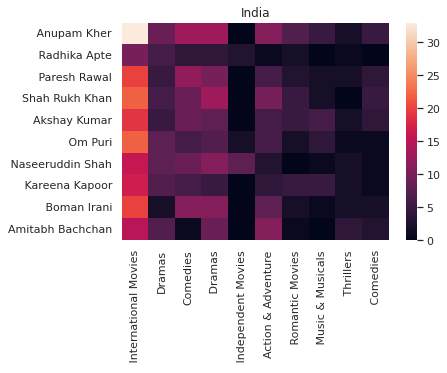

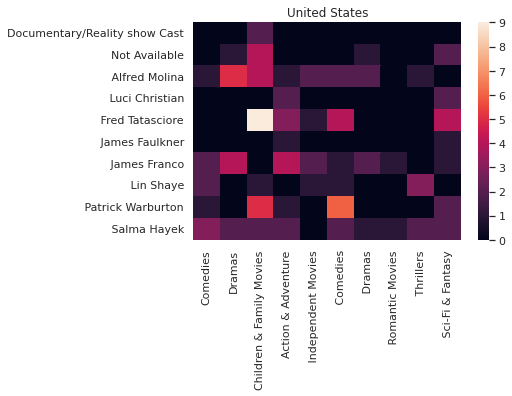

In [ ]:
l=['India','United States']

for i in range(len(l)):
  rows = ans_df['castName'][ans_df['country']==l[i]].value_counts().index[:10]
  cols = ans_df['genre'][ans_df['country']==l[i]].value_counts().index[:10]

  ans_dff = ans_df[ans_df['country']==l[i]].pivot_table(index='castName',columns='genre',values='title',aggfunc=fun).fillna(0)

  ans_dff = ans_dff.loc[rows,cols]
  plt.figure()
  plt.title(l[i])
  sns.heatmap(ans_dff)

We get following insights from above analysis:

1.   **In India,content in which Anupam Kher has acted and is of genre "International Movies" are most popular content followed by Boman Irani, Shah rukh Khan and Om Puri of same Genre.**
2.   **In United States , content of type"Children & Family movies" where Fed Tatasciore has acted are popular.**
3. **Comic content in which Patrick Warburton has acted is second most poular content in US.**





# Checking How is director genre impacting the content distribution on top2 countries 

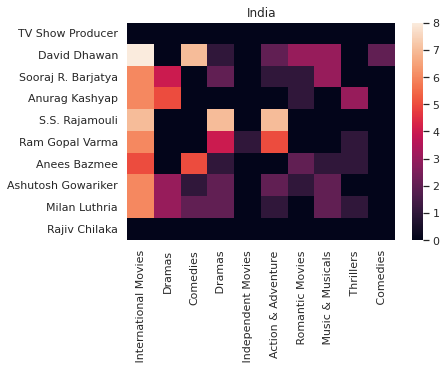

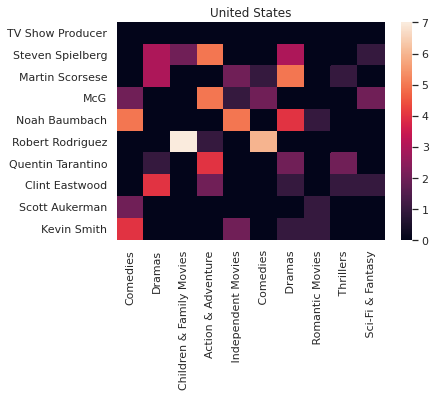

In [ ]:
l=['India','United States']

for i in range(len(l)):
  rows = ans_df['directorName'][ans_df['country']==l[i]].value_counts().index[:10]
  cols = ans_df['genre'][ans_df['country']==l[i]].value_counts().index[:10]

  ans_dff = ans_df[ans_df['country']==l[i]].pivot_table(index='directorName',columns='genre',values='title',aggfunc=fun).fillna(0)

  ans_dff = ans_dff.loc[rows,cols]
  plt.figure()
  plt.title(l[i])
  sns.heatmap(ans_dff)

From above heatmap we can infer that:

1.   **In India, if David Dhawan is director of movie with genre type "International Movies" or "Comedies", then that content type is having very high popularity or higher content numbers.**
2.   **In US , content with genre type "Children and Families" or "Comedies" AND director Robert Rodriguez is having high popularity.**
3. **Movies where SS Rajamoulie is direcor and if it is Action/Drama/International Movie" than those movies are quite popular in India**



# Impact of Launch time on Content Distribution

Earlier we have seen that there is hardly any impact of Launch time on Content distribution but still Decmember and July were coming out to be having highest number of launches. Lets now try to see this over country wise

In [ ]:
temp = preprocessed_df[['title','Year_added','Month_added','Day_Added','release_year','country']].drop_duplicates()
temp

,title,Year_added,Month_added,Day_Added,release_year,country
0,#Alive,2020,9,Tuesday,2020,South Korea
6,#AnneFrank - Parallel Stories,2020,7,Wednesday,2019,Italy
14,#FriendButMarried,2020,5,Thursday,2018,Indonesia
38,#FriendButMarried 2,2020,6,Sunday,2020,Indonesia
62,#Roxy,2019,4,Wednesday,2018,Canada
...,...,...,...,...,...,...
200960,忍者ハットリくん,2018,12,Sunday,2012,Japan
200962,海的儿子,2018,4,Friday,2016,Not Available
200972,마녀사냥,2018,2,Monday,2015,South Korea
200987,반드시 잡는다,2018,2,Wednesday,2017,South Korea


## Checking Launch month impact for India

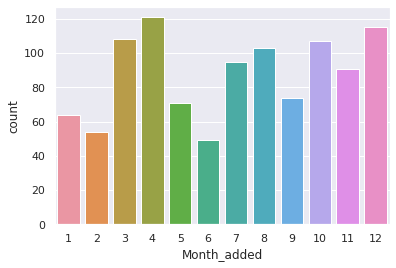

In [ ]:
ans_df = temp[temp['country']=='India'][['title','Month_added']]
ans_df.drop_duplicates(inplace=True)
sns.countplot(x='Month_added',data=ans_df)

1. **From Above plot , we can see that April and December are the months in which most of contents are launched in India**

2. March,August and October are other popular months in which contents are launched.

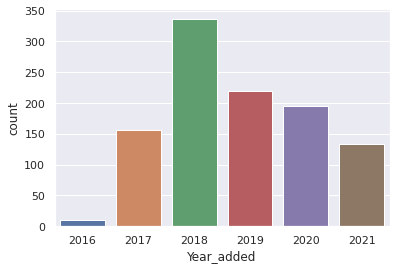

In [ ]:
ans_df = temp[temp['country']=='India'][['title','Year_added']]
ans_df.drop_duplicates(inplace=True)
sns.countplot(x='Year_added',data=ans_df)

**we can see that Number of contents in India launched from Netflix have decreased post 2018** bold text

Text(0, 0.5, 'Number of Contents')

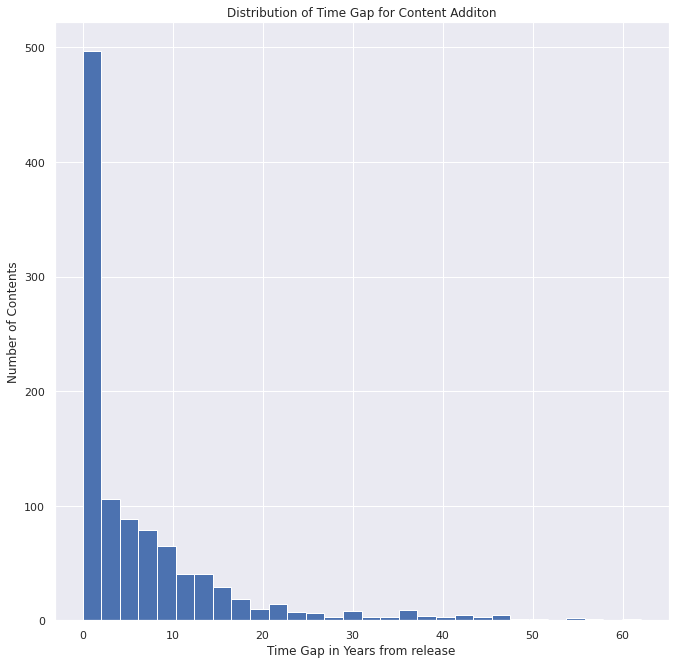

In [ ]:
temp['gap_to_launch'] = temp['Year_added']-temp['release_year']


plt.figure(figsize=(11,11))
temp['gap_to_launch'][temp['country']=='India'].hist(bins=30)
plt.title('Distribution of Time Gap for Content Additon')
plt.xlabel('Time Gap in Years from release')
plt.ylabel('Number of Contents')

1.   **It is observed that most of the content are added in Netflix within 2 years from time of release of Content**
2.   There are some content which dates back to as long as 50 to 60 years.



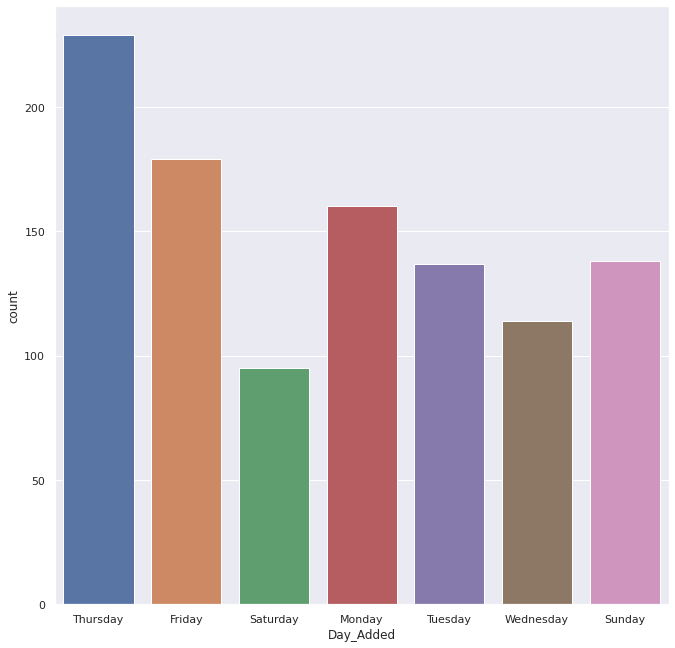

In [ ]:
ans_df = temp[temp['country']=='India'][['title','Day_Added']]
ans_df.drop_duplicates(inplace=True)
plt.figure(figsize=(11,11))
sns.countplot(x='Day_Added',data=ans_df)

1.   **We can see that number of Contents being launched in India are released most of times on Thursday**
2.   **Other day that sees second highest number of launches is Friday**

## Checking Launch month impact for United States

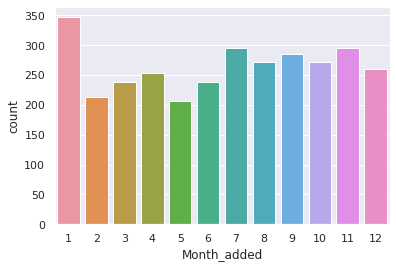

In [ ]:
ans_df = temp[temp['country']=='United States'][['title','Month_added']]
ans_df.drop_duplicates(inplace=True)
sns.countplot(x='Month_added',data=ans_df)

1. **From above plot we can see that Most number of contents are added in Month of January.**
2. **July is the second best month for content addition in US.**

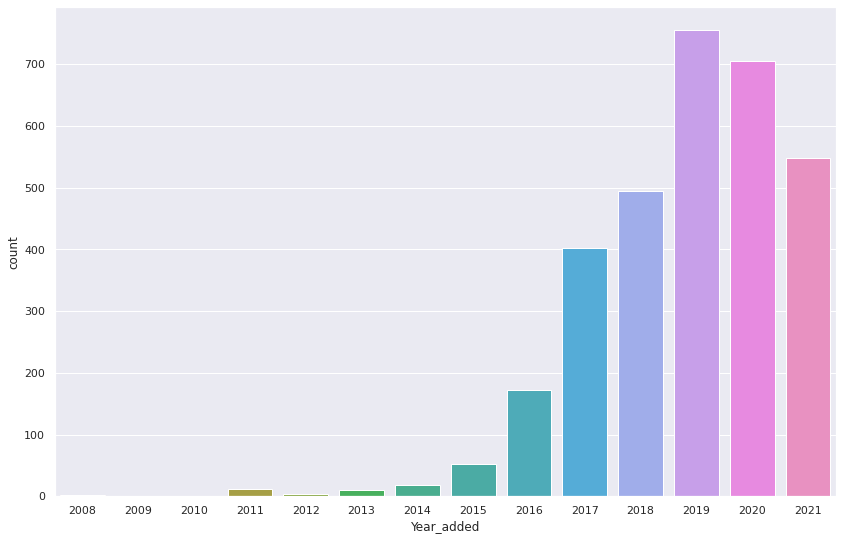

In [ ]:
ans_df = temp[temp['country']=='United States'][['title','Year_added']]
ans_df.drop_duplicates(inplace=True)
plt.figure(figsize=(14,9))
sns.countplot(x='Year_added',data=ans_df)

From above figure we can see that number of contents in US being added was increasing exponential till the year 2019 post which there is a decline in the number of content addition.

Text(0, 0.5, 'Number of Contents')

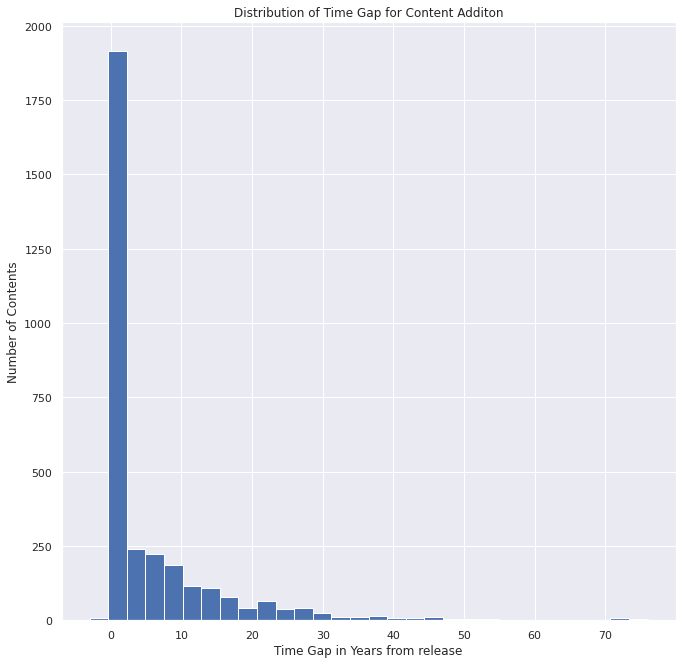

In [ ]:
plt.figure(figsize=(11,11))
temp['gap_to_launch'][temp['country']=='United States'].hist(bins=30)
plt.title('Distribution of Time Gap for Content Additon')
plt.xlabel('Time Gap in Years from release')
plt.ylabel('Number of Contents')

It is observed that Most number of contents are added within 2 years from content release.

There are contents which are old as outdated as 70 years

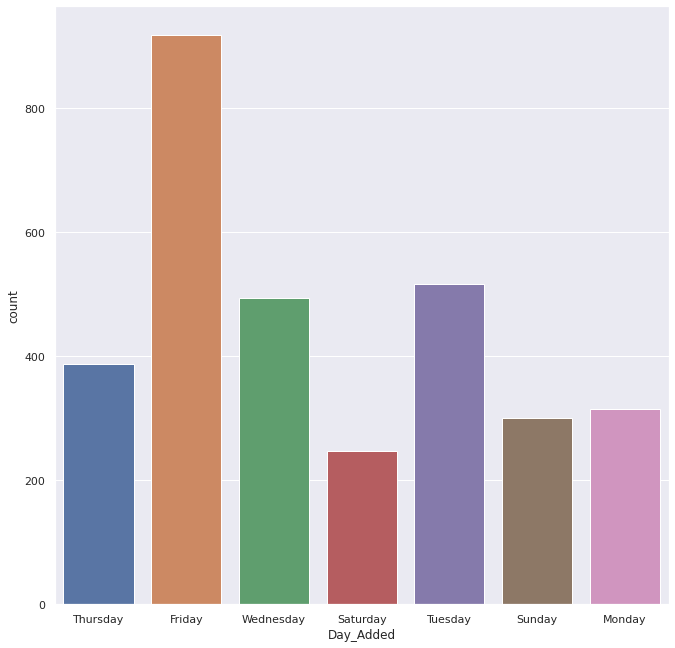

In [ ]:
ans_df = temp[temp['country']=='United States'][['title','Day_Added']]
ans_df.drop_duplicates(inplace=True)
plt.figure(figsize=(11,11))
sns.countplot(x='Day_Added',data=ans_df)

1. **we can see that Friday is the most popular day to add contents in Netflix in US**
2. Tuesday is second highest month for adding cintents

# Distribution of Content types in top5 countries

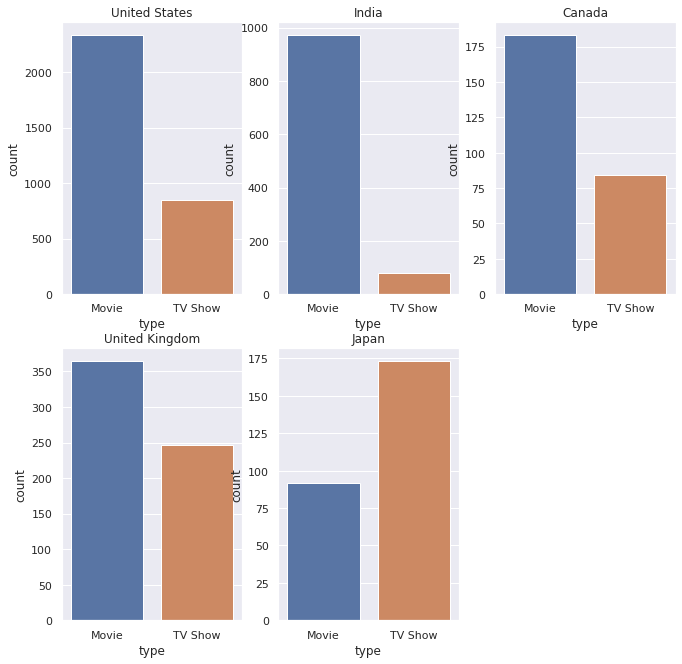

In [ ]:
l = ['United States','India','Canada','United Kingdom','Japan']
plt.figure(figsize=(11,11))
for i in range(len(l)):

  # plt.subplot(y)
  y=231+i
  plt.subplot(y)
  ans_df = genre_df[genre_df['country']==l[i]][['title','type']]
  ans_df.drop_duplicates(inplace=True)
  
  plt.title(l[i])
  sns.countplot(x='type',data=ans_df)



1. **Apart from Japan, all other top countries have TV shows content lower than Movies.**
2.   India is having the highest Movie to TV show ratio among all top 5 countires.
3.  **In UK, TV shows have almost reasonable 40% of share of all the contents higher than US and Canada.**



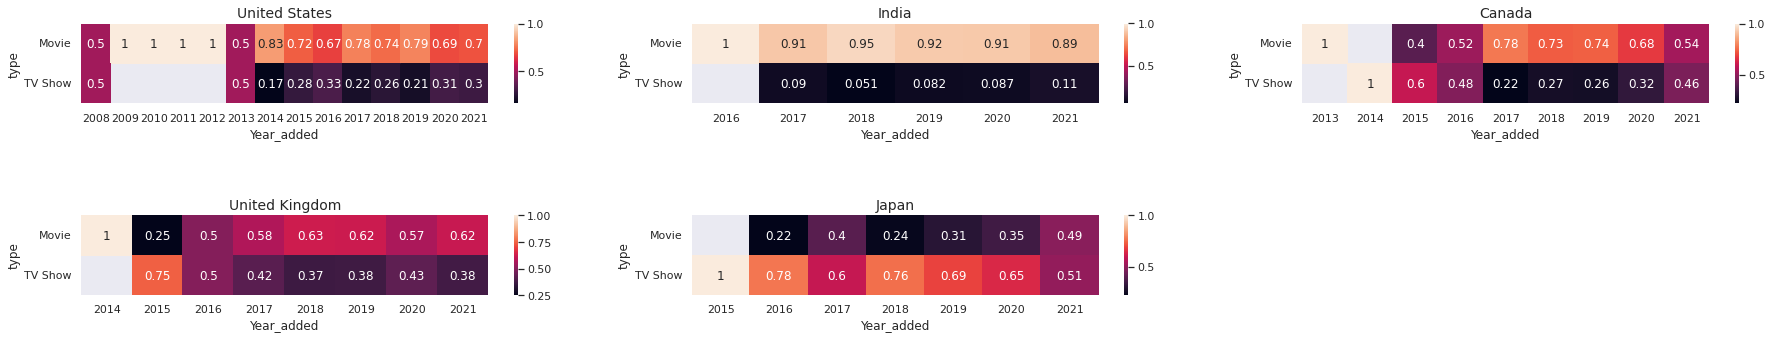

In [ ]:
plt.figure(figsize=(31,5))

for i in range(len(l)):
  ans_df = genre_df[genre_df['country']==l[i]]

  ans_df = ans_df[['Year_added','title','type']]
  ans_df.drop_duplicates(inplace=True)
  ans_dff = ans_df.pivot_table(index='type',columns='Year_added',values='title',aggfunc=fun).apply(lambda x:x/x.sum(axis=0))
  
  # print(l[i])
  if i<=2:
    y= 331+i
  else:
    y= 334+i
  plt.subplot(y)
  plt.title(l[i],fontsize=14)
  sns.heatmap(ans_dff,annot=True)

From above plot we can see that:
1. All other countries apart from Japan and Canada is not seeing any change in trend of % Movie and %TV shows over years.
2. **In Japan and Canada , over recent years we can see the trend of share of TV shows and Movie contents to be becoming almost equal in recent years.**

In [ ]:
ans_df = genre_df[genre_df['country']=='United States']

ans_df = ans_df[['Year_added','title','type']]
ans_df.drop_duplicates(inplace=True)
ans_dff = ans_df.pivot_table(index='type',columns='Year_added',values='title',aggfunc=fun).apply(lambda x:x/x.sum(axis=0))
ans_dff

Year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,0.5,1.0,1.0,1.0,1.0,0.5,0.833333,0.716981,0.668605,0.781095,0.740891,0.78543,0.685552,0.698905
TV Show,0.5,NaN,NaN,NaN,NaN,0.5,0.166667,0.283019,0.331395,0.218905,0.259109,0.21457,0.314448,0.301095


# Evaluation Metric 7: *Buisiness* Insights

**Duration:**
1. Half of the Movie content duration is between 89 minutes to 106 minutes.
2. Movie Duration is more or likely is having Normal distribution(as mean is approximately equal to median)  with good concentration around center and having outliers towards very short movies < 30 minutes and very long movies (>200 minutes).
3.Most of TV Show Contents have 1 season only
4. Very few TV Shows (14 of them) have more than 10 seasons.
5. Highest seasons in any TV show content is 17.
6. Most of movie contents are of duration 90 minutes
7.India has longest Movie duration contents among top5 countries (US, India, Canada, Japan ,UK)
8. India has 50% of the contents between 109 to 142 minutes.
9. Canadians prefer to watch shorter movie content compared to other top 5 countries.
10.In recent years, Japan have seen more contents of shorter Movie duration compared to previous years.
11. US is having the highest number of Maximum season TV shows follwed by Canda and UK
12. India is having relatively the lowest maximum seasons of TV Shows which is 3
13. India is having 1.33% of movie content duration of more than 3 hours whereas for US it s a negligible 0.34%.
       
**Content Release date**

1. Netflix Content is skewed towards release date after 2017 and there are only 25% of content released before 2013.

2. TV Shows which are added to Netflix content are quite new release as compared to Movies which still have significant weight age towards older release date.
       
       
       
**Number of Contents and Countries**

1.  Highest Number of Contents is from United States
2.There are close to 200 countries contents in Netflix
3.United States and India accounts for almost 60% of total contents.
4.Top 5 countries contributing are US, India, UK, Canada and Japan
5.### **From COVID pandemic year (2020)  on-wards, there is a decline in number of Contents added in Netflix.**
6.### **Upon analyzing further it was observed Number of contents in India launched from Netflix have decreased significantly post 2018** 
7.### **Number of contents in US being added was increasing exponential till the year 2019 post which there is a decline in the number of content addition.**
       
##Rating:

1.  Netflix has highest number of content of category TV-MA.
2. In recent years, content distribution is seen growing to other Ratings type as well.
3. But distribution is more concentrated towrds TV-MA for all these years.
4. "Independent Movies" with rating type"TV-MA" or"TV-14" are the most popular 	      `	     content types

5. Second Most popular content Type is "Docuseries" with rating type"TV-MA".

6. In US, Documentaries and Stand up Comedies with "TV-MA" ratings are hot 	  	favorites followed by Drama with category "R".
7.In India, International movies with "TV-14" rating are hot favorite followed by "	Dramas" with same category
8.In UK, British TV Shows with "TV-MA" rating are top favorites followed by 	International TV Shows with same rating.
9.In Japan , Anime Series with "TV-14" and "TV-MA" rating followed by International TV 	Shows of similar rating are top favorites content.\
10.In Canada ,Dramas with category "TV-MA" category are top favorite contents
       
## Genre
       
1.Highest number of the contents are of Genre type "International Movies" followed by "Dramas"
2. India have very clear and distinct taste towards "International Movies" Genre
3.  In US and Canada there is no as such clear distinction but still "Drama" genre is most popular genre in US.
4. In Japan there is a very high liking towards "Anime Series" genre.
5. In UK , there is a very high liking towards "British TV Shows".
6. Docuseries/Documentaries are among popular genre types in US,UK and Canada
       
       
##Content Launch Date
1.Netflix has highest number of content added on 1st January 2020
2. About 93% of contents are added in last 5 years(2017 till 2021) 
3. In year 2019,highest number of contents were added.
4. April and December are the months in which most of contents are launched in India
4. Most of Contents are added on Friday followed by Saturday
5. About 50% of content are added on Weekends
6.Most number of contents are added within 2 years from content release.
7. We can see that Friday is the most popular day to add contents in Netflix in US
       
##Type:
1. About two-third of content(6131 out of 8797) is Movie
2. In latest additions Movies type contents are significantly higher as compared to TV shows type. 
3. Japan has higher number of TV Shows compared to Movies which is opposite of trend in other top 5 countries.
4. UK is having decent % (40%) of TV shows compared to Movies
5. India is having highest Movie to TV Show ratios among all top 5 countries
6. In Japan and Canada , over recent years it is observed that the trend of share of TV shows and Movie contents is becoming almost equal.
       
       
##Cast:
1. Netflix have most of content featuring real life characters or reality show contestants
2. Actor 'Anupam Kher' had been cast highest number of times (39 times) out of all actors in world in Netflix Contents. 
3. Out of top 10 cast in terms of content counts, 7 are Indian Casts. So Netflix has majority of contents featuring Indian Cast.
4. In India, content in which Anupam Kher has acted and is of genre "International Movies" are most popular content followed by Boman Irani, Shahrukh Khan and Om Puri of same Genre.
5. In United States , Fed Tatasciore acting in” Children and Family” genre is popular.
6. Patrick Warburton acting in “Comic” genre is among second most popular combination for US content.
7. In Japan , combination of Anime TV Series producer with voice over artist Takahiro 	Sakurai is most popular combination.
       
##Director/Director-Cast movie:
       
1. Rajiv Chikala directions content are highest (Almost 22 times)

2. In India , Mr. Rajiv Chikala combinations with Rajesh Kava, Julie Tejwani and others are having most number of contents which basically belongs to Child TV Show category

4. In India, if David Dhawan is director of movie with genre type "International Movies" 	or "Comedies", then that content type is having very high popularity or higher content 	numbers
5. In US , content with genre type "Children and Families" or "Comedies" AND director 	Robert Rodriguez is having high popularity
6. Movies where SS Rajamoulie is director and if it is Action/Drama/International 	Movie" than those movies are quite popular in India





# Evaluation Metric 8: Recommendations

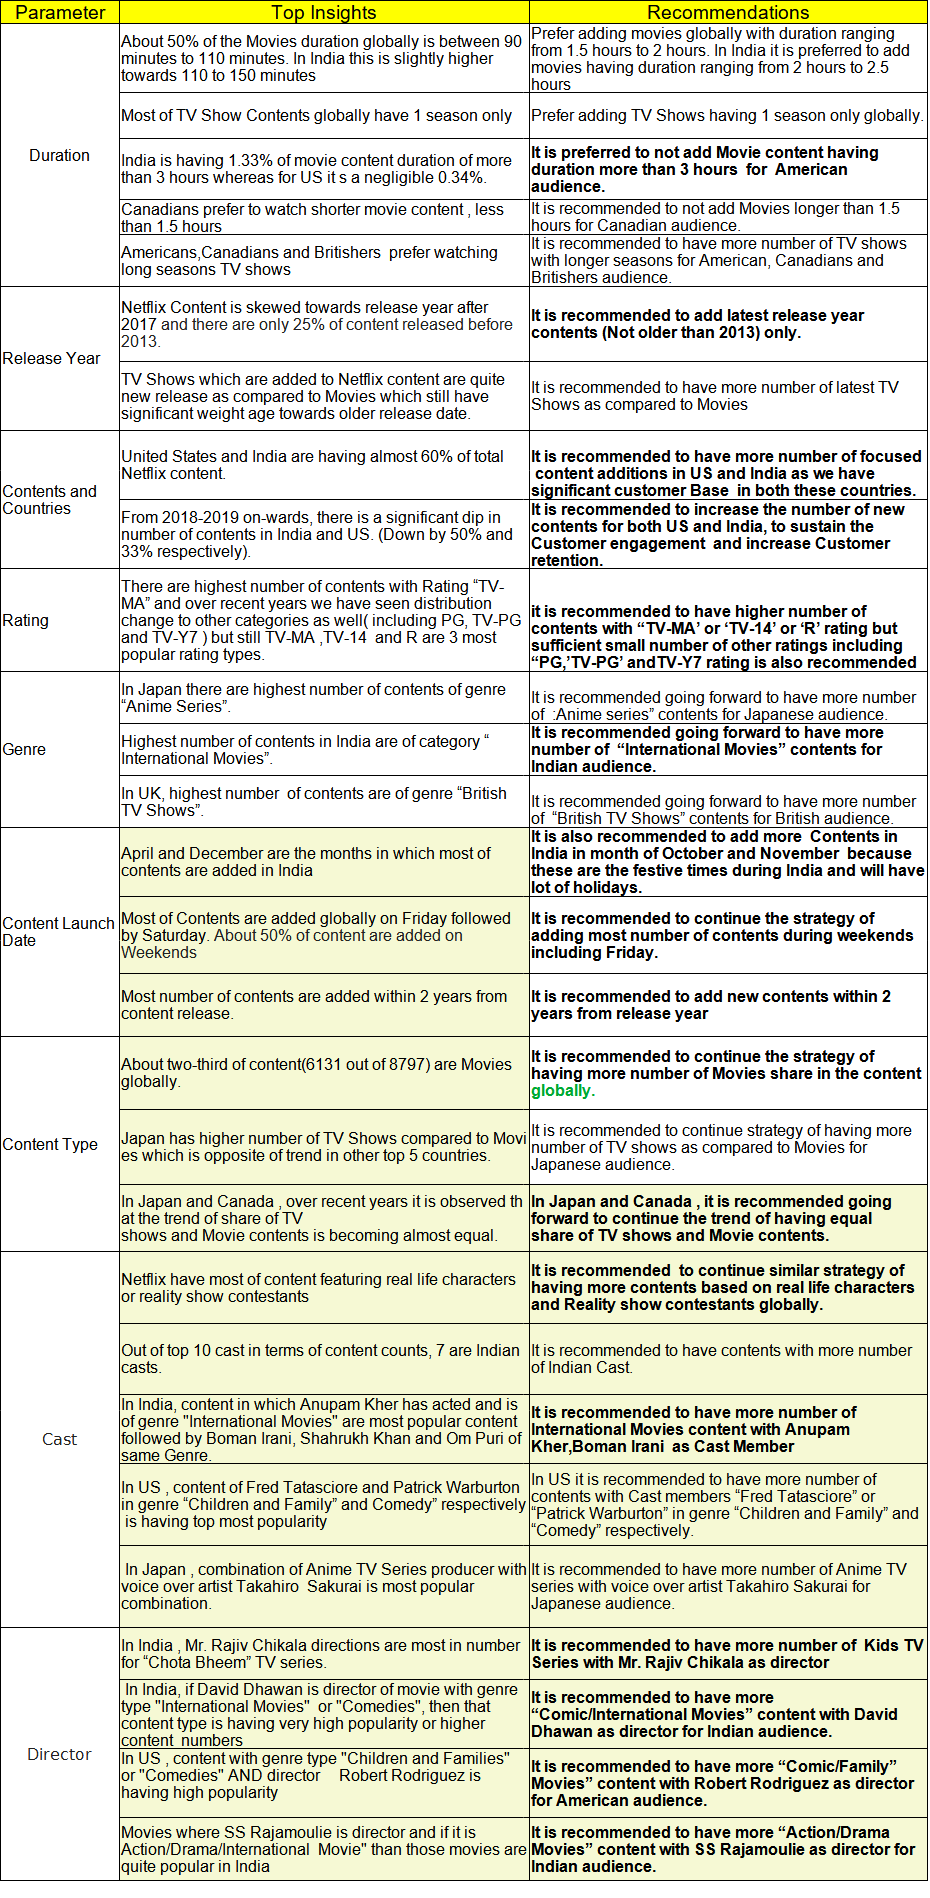